1. Make a plot of density versus depth
---
• Barnett data – assume a reasonable surface density 1.8778 g/cm3 to extrapolate to the
first measurement point.

• GOM data – use a density of 1.0 g/cm3 from the surface to the sea floor (depth of 1000
ft) and a formation density of 1.7 g/cm3 at the sea floor. Linearly interpolate the density
between the sea floor and the depth at which the data starts (at the depth of 3515 ft).

In [1]:
#Conect with drive to upload the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
#Import all necessary packs
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the datas
Barnett_Shale = pd.read_table('/content/drive/MyDrive/Cursos /Reservoir Mechanichs /Homework 1 /Data_Barnett_Shale.csv', sep=";" , index_col='Depth(ft)')
#Eliminate no data
Barnett_Shale = Barnett_Shale.replace('-999',np.nan)

#Read the datas
Golfo_Mexico = pd.read_table('/content/drive/MyDrive/Cursos /Reservoir Mechanichs /Homework 1 /Golfo_mexico_data.csv', sep=";", index_col='Depth(ft)')
#Eliminate no data
Golfo_Mexico = Golfo_Mexico.replace('-999',np.nan)


In [70]:
Barnett_Shale.head()

,Density (g/cc)
Depth(ft),
100.5,1.8778
101.0,1.8709
101.5,1.8317
102.0,1.8363
102.5,1.8500


In [71]:
#View the data
Golfo_Mexico.head()

,Density (g/cc)
Depth(ft),
3515,2.154
3516,2.126
3517,2.098
3518,2.063
3519,2.084


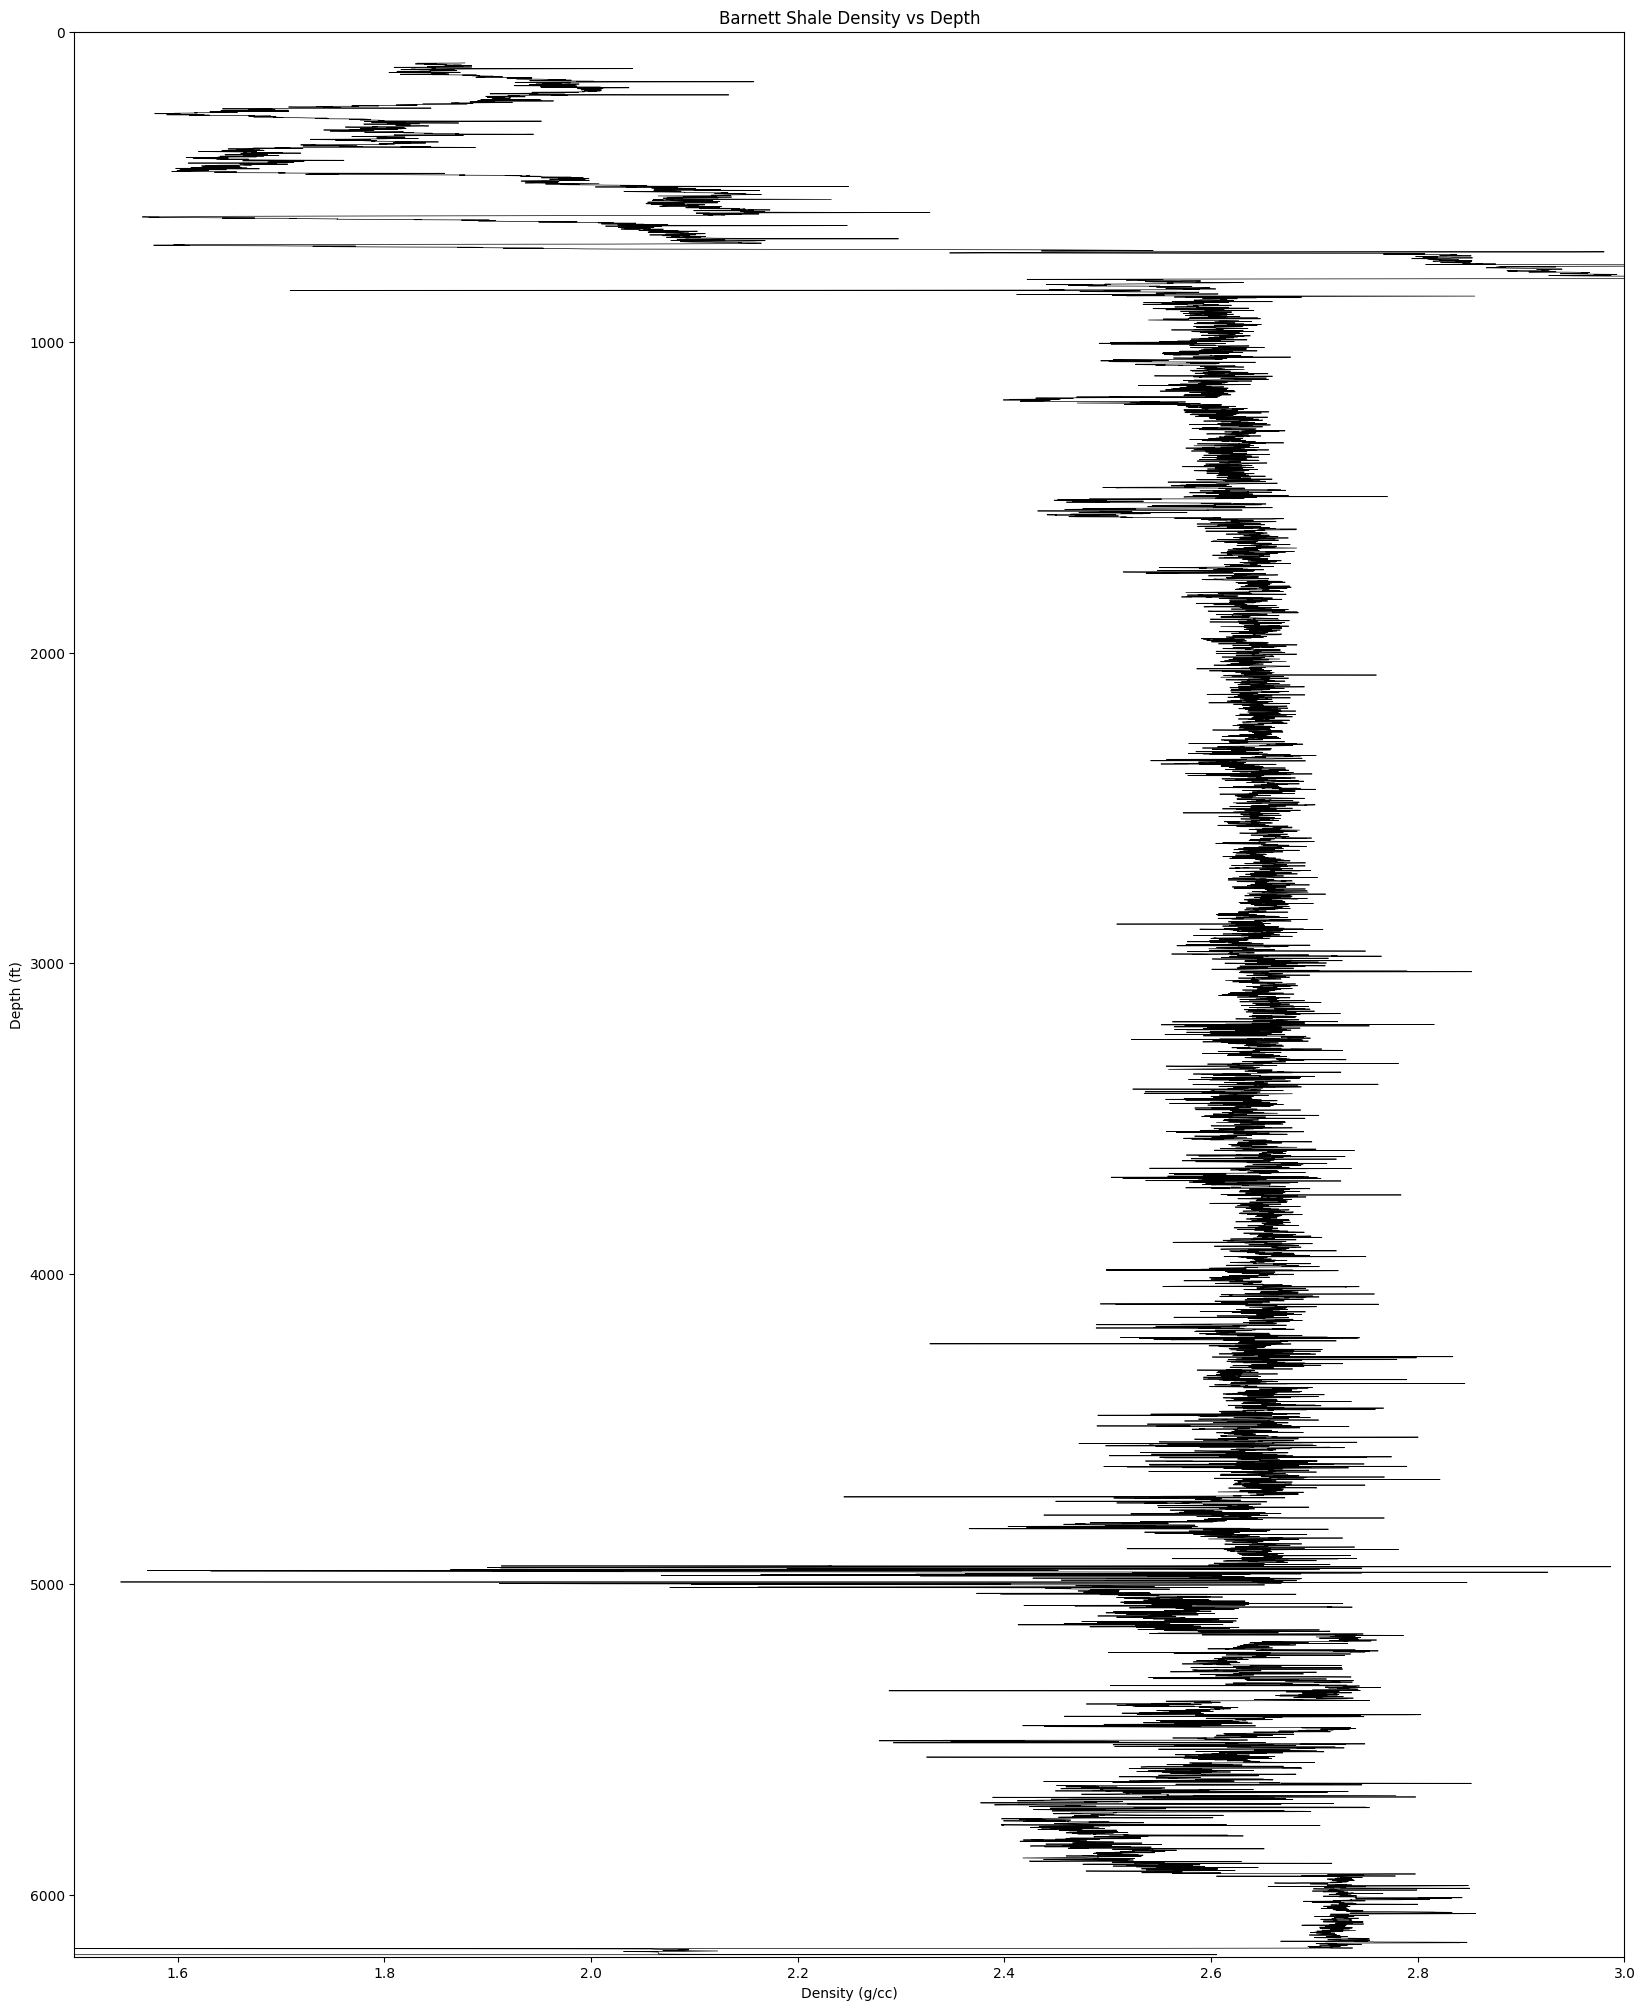

In [72]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Barnett_Shale['Density (g/cc)'], Barnett_Shale.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(1.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(6200, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Barnett Shale Density vs Depth')

#plt.invert_yaxis()
# Exiba o gráfico
plt.show()

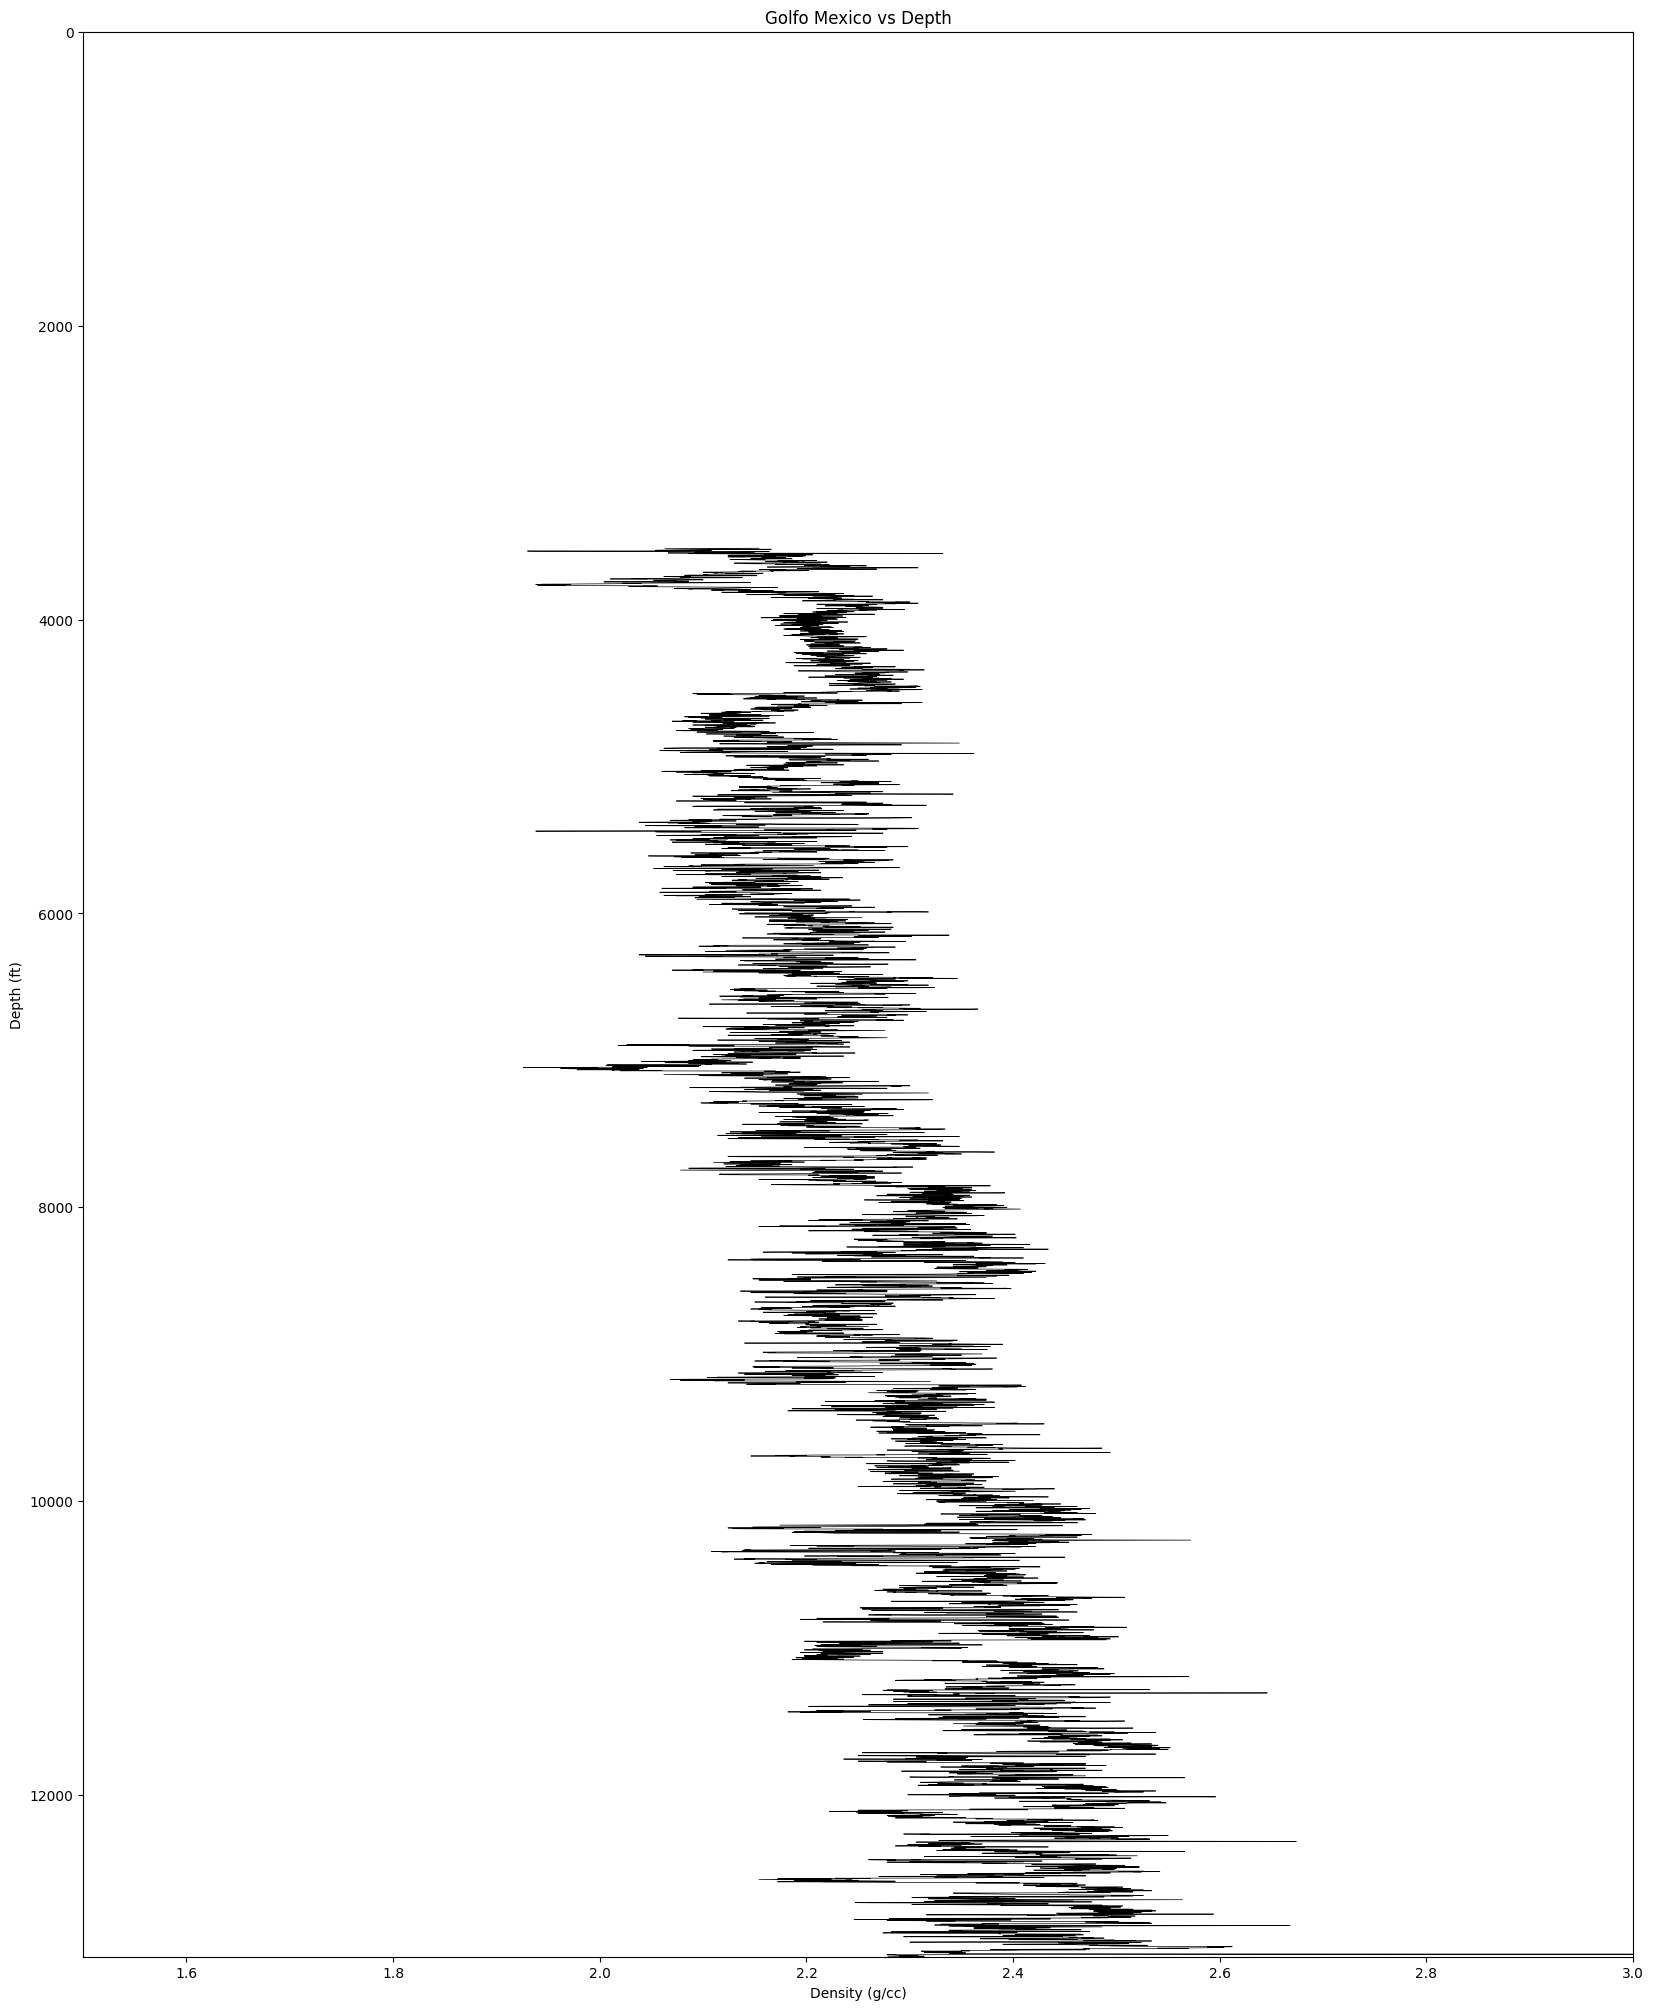

In [73]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico['Density (g/cc)'], Golfo_Mexico.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(1.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(13100, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Golfo Mexico vs Depth')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()


2) “Block” the log into 5 depth units by assuming an approximately constant density over a
given range of depths. Compute and plot the averaged density in each block and your
blocked density as a function of depth for each dataset

In [74]:

# Definir o intervalo de profundidade desejado (0,5 ft)
ft_interval = 0.5

# Calcular a quantidade total de valores a serem adicionados (201 valores de 0,5 a 100)
total_values = int(100 / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0,5
Depth = [i * ft_interval for i in range(total_values)]

# Criar uma lista de densidades com o valor constante 1.8778
Density = [1.8778] * total_values

# Criar o dataframe com as colunas 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_top = pd.DataFrame({
    'Depth(ft)': Depth,
    'Density (g/cc)': Density,
})

# Exibir o dataframe resultante
print(Barnett_Shale_top.head())



Barnett_Shale_top_index = Barnett_Shale_top.set_index('Depth(ft)')
# Exibir o dataframe resultante
Barnett_Shale_top.tail()


   Depth(ft)  Density (g/cc)
0        0.0          1.8778
1        0.5          1.8778
2        1.0          1.8778
3        1.5          1.8778
4        2.0          1.8778


,Depth(ft),Density (g/cc)
196,98.0,1.8778
197,98.5,1.8778
198,99.0,1.8778
199,99.5,1.8778
200,100.0,1.8778


In [75]:
Barnett_Shale_top = Barnett_Shale_top.set_index('Depth(ft)')
Barnett_Shale_top.tail()

,Density (g/cc)
Depth(ft),
98.0,1.8778
98.5,1.8778
99.0,1.8778
99.5,1.8778
100.0,1.8778


In [76]:
Barnett_Shale.head()

,Density (g/cc)
Depth(ft),
100.5,1.8778
101.0,1.8709
101.5,1.8317
102.0,1.8363
102.5,1.8500


In [77]:
Barnett_Shale_concat = pd.concat([Barnett_Shale_top, Barnett_Shale])
print(Barnett_Shale_concat)


           Density (g/cc)
Depth(ft)                
0.0                1.8778
0.5                1.8778
1.0                1.8778
1.5                1.8778
2.0                1.8778
...                   ...
6196.5          -999.0000
6197.0          -999.0000
6197.5          -999.0000
6198.0          -999.0000
6198.5          -999.0000

[12398 rows x 1 columns]


In [78]:
#Calculate the porosity
#Define the premises
ρf = 1.0 # an average approximation of the fluid density of the rock
ρm = 2.7 # an average approximation of the pure rock density (no pores)
#set NaN values
# defines the formula, in the values below 2.0 I discarded the calculation because there are no rocks with such low density
def calculate_porosity(x):
    if x < 2.0:
        return np.nan
    else:
        return ((x - ρm) / (ρf - ρm)) *100

Barnett_Shale_concat['porosity (%)'] = Barnett_Shale_concat['Density (g/cc)'].apply(calculate_porosity)



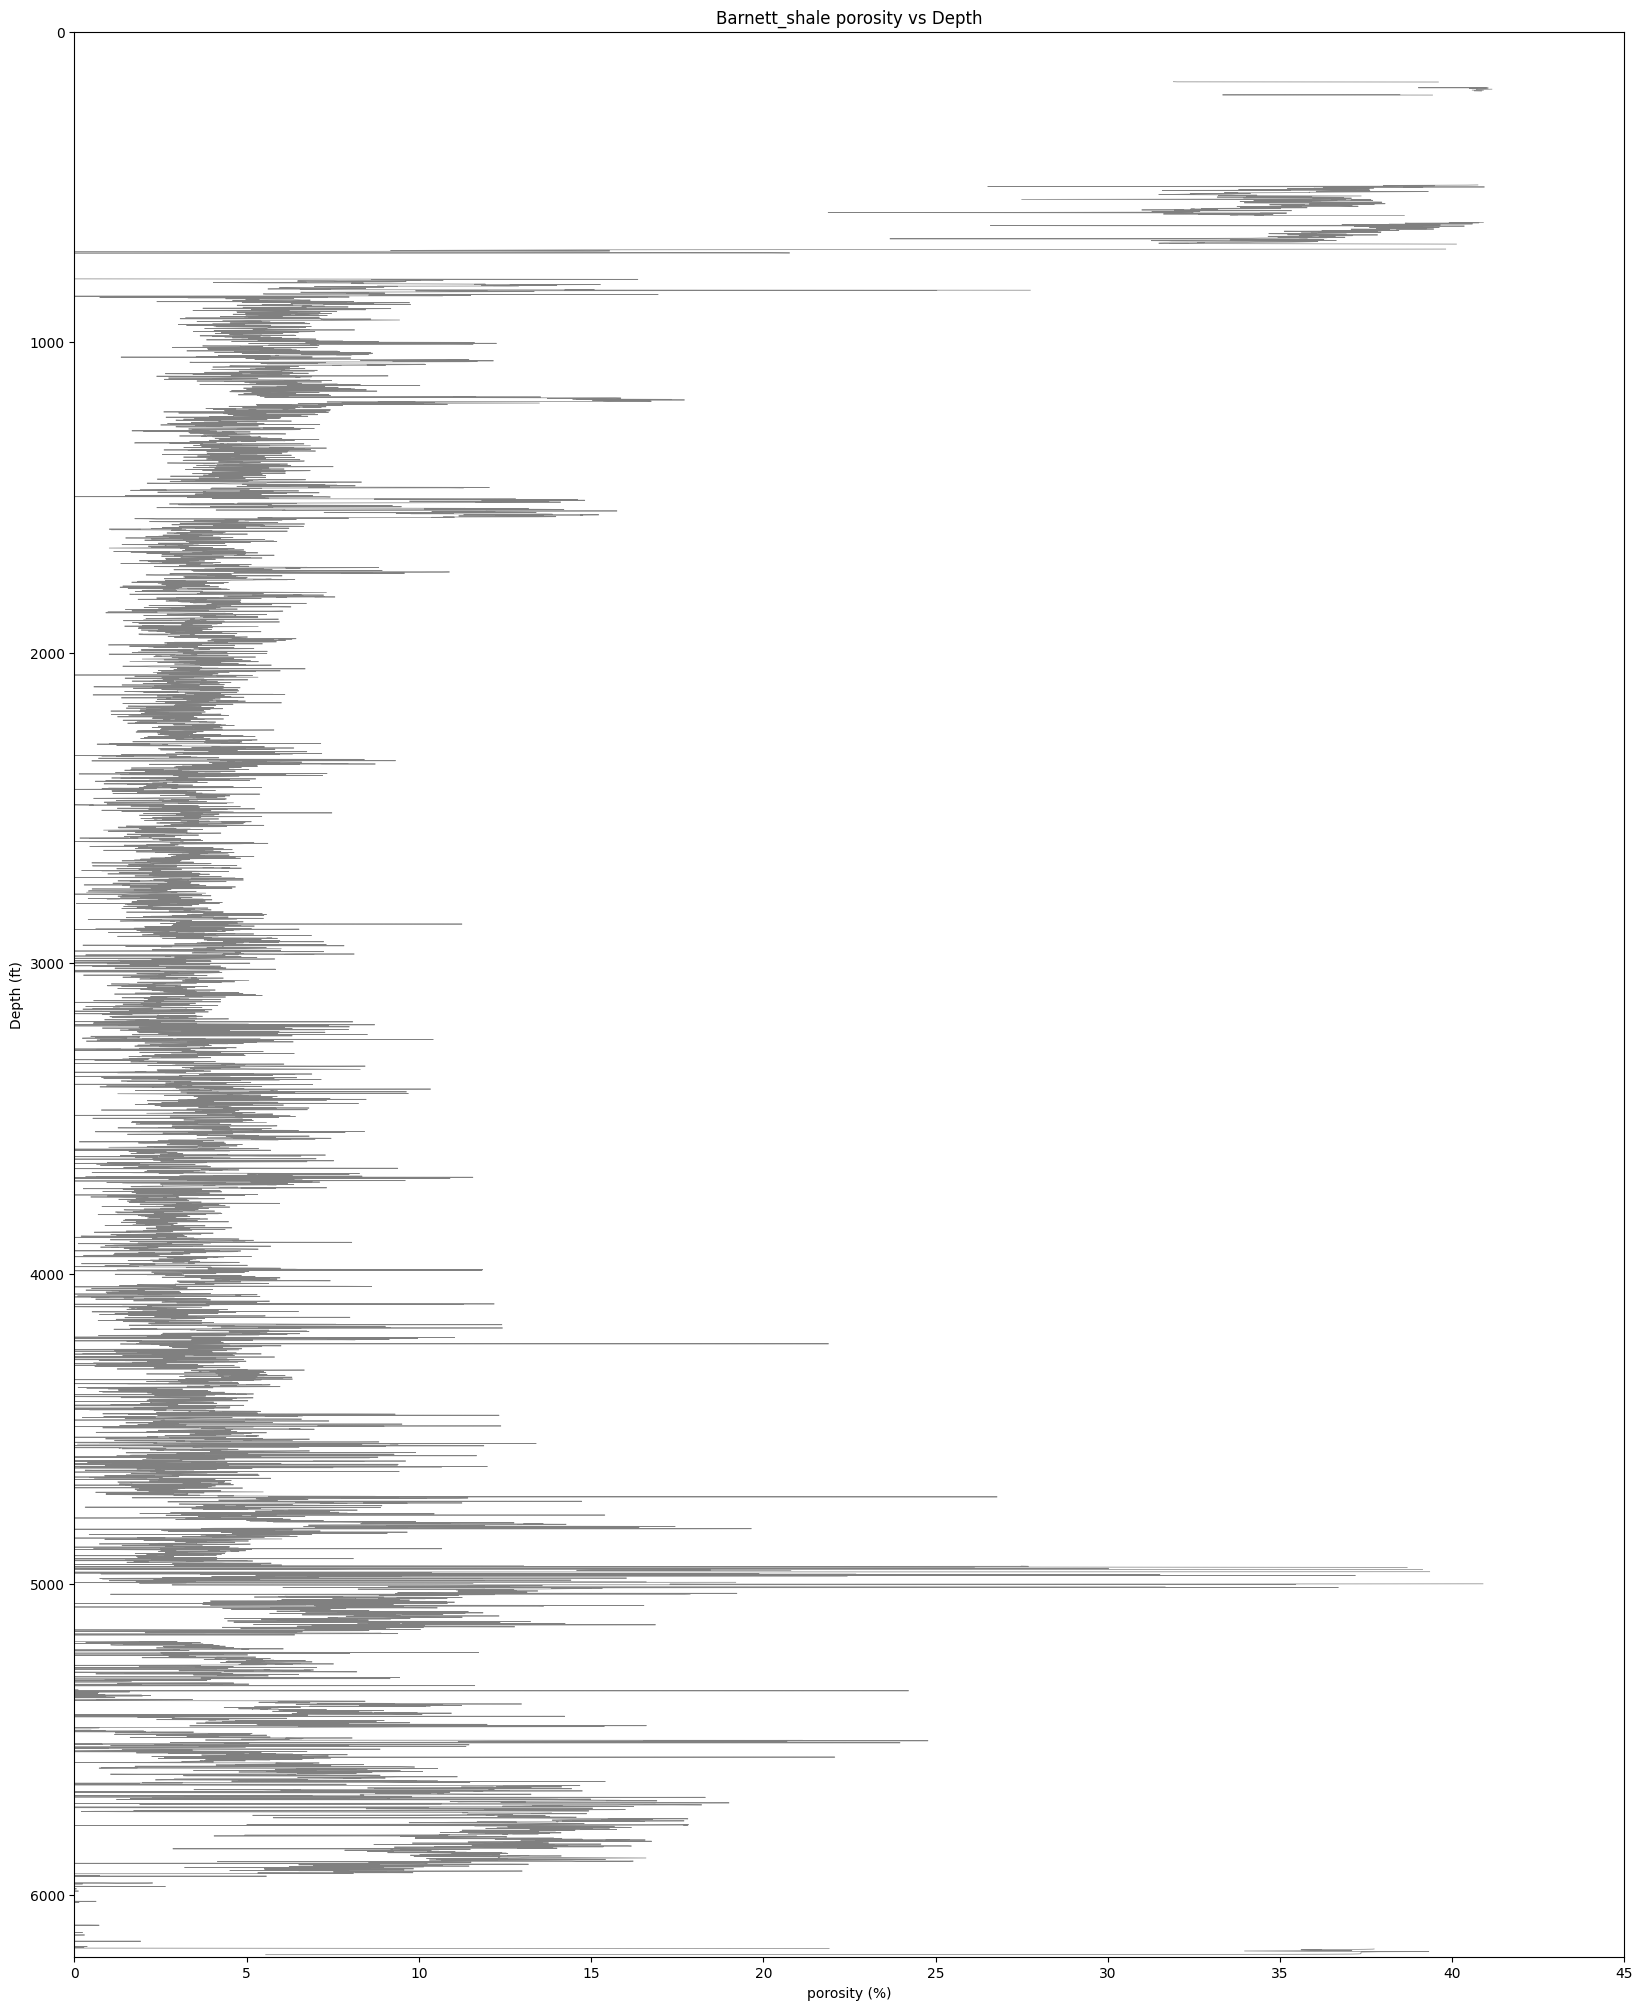

In [79]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Barnett_Shale_concat['porosity (%)'], Barnett_Shale_concat.index, linewidth=0.5, color='gray')

# Set the limits for the x and y axis
plt.xlim(0, 45)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(6200, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('porosity (%)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Barnett_shale porosity vs Depth')


# Exiba o gráfico
plt.show()

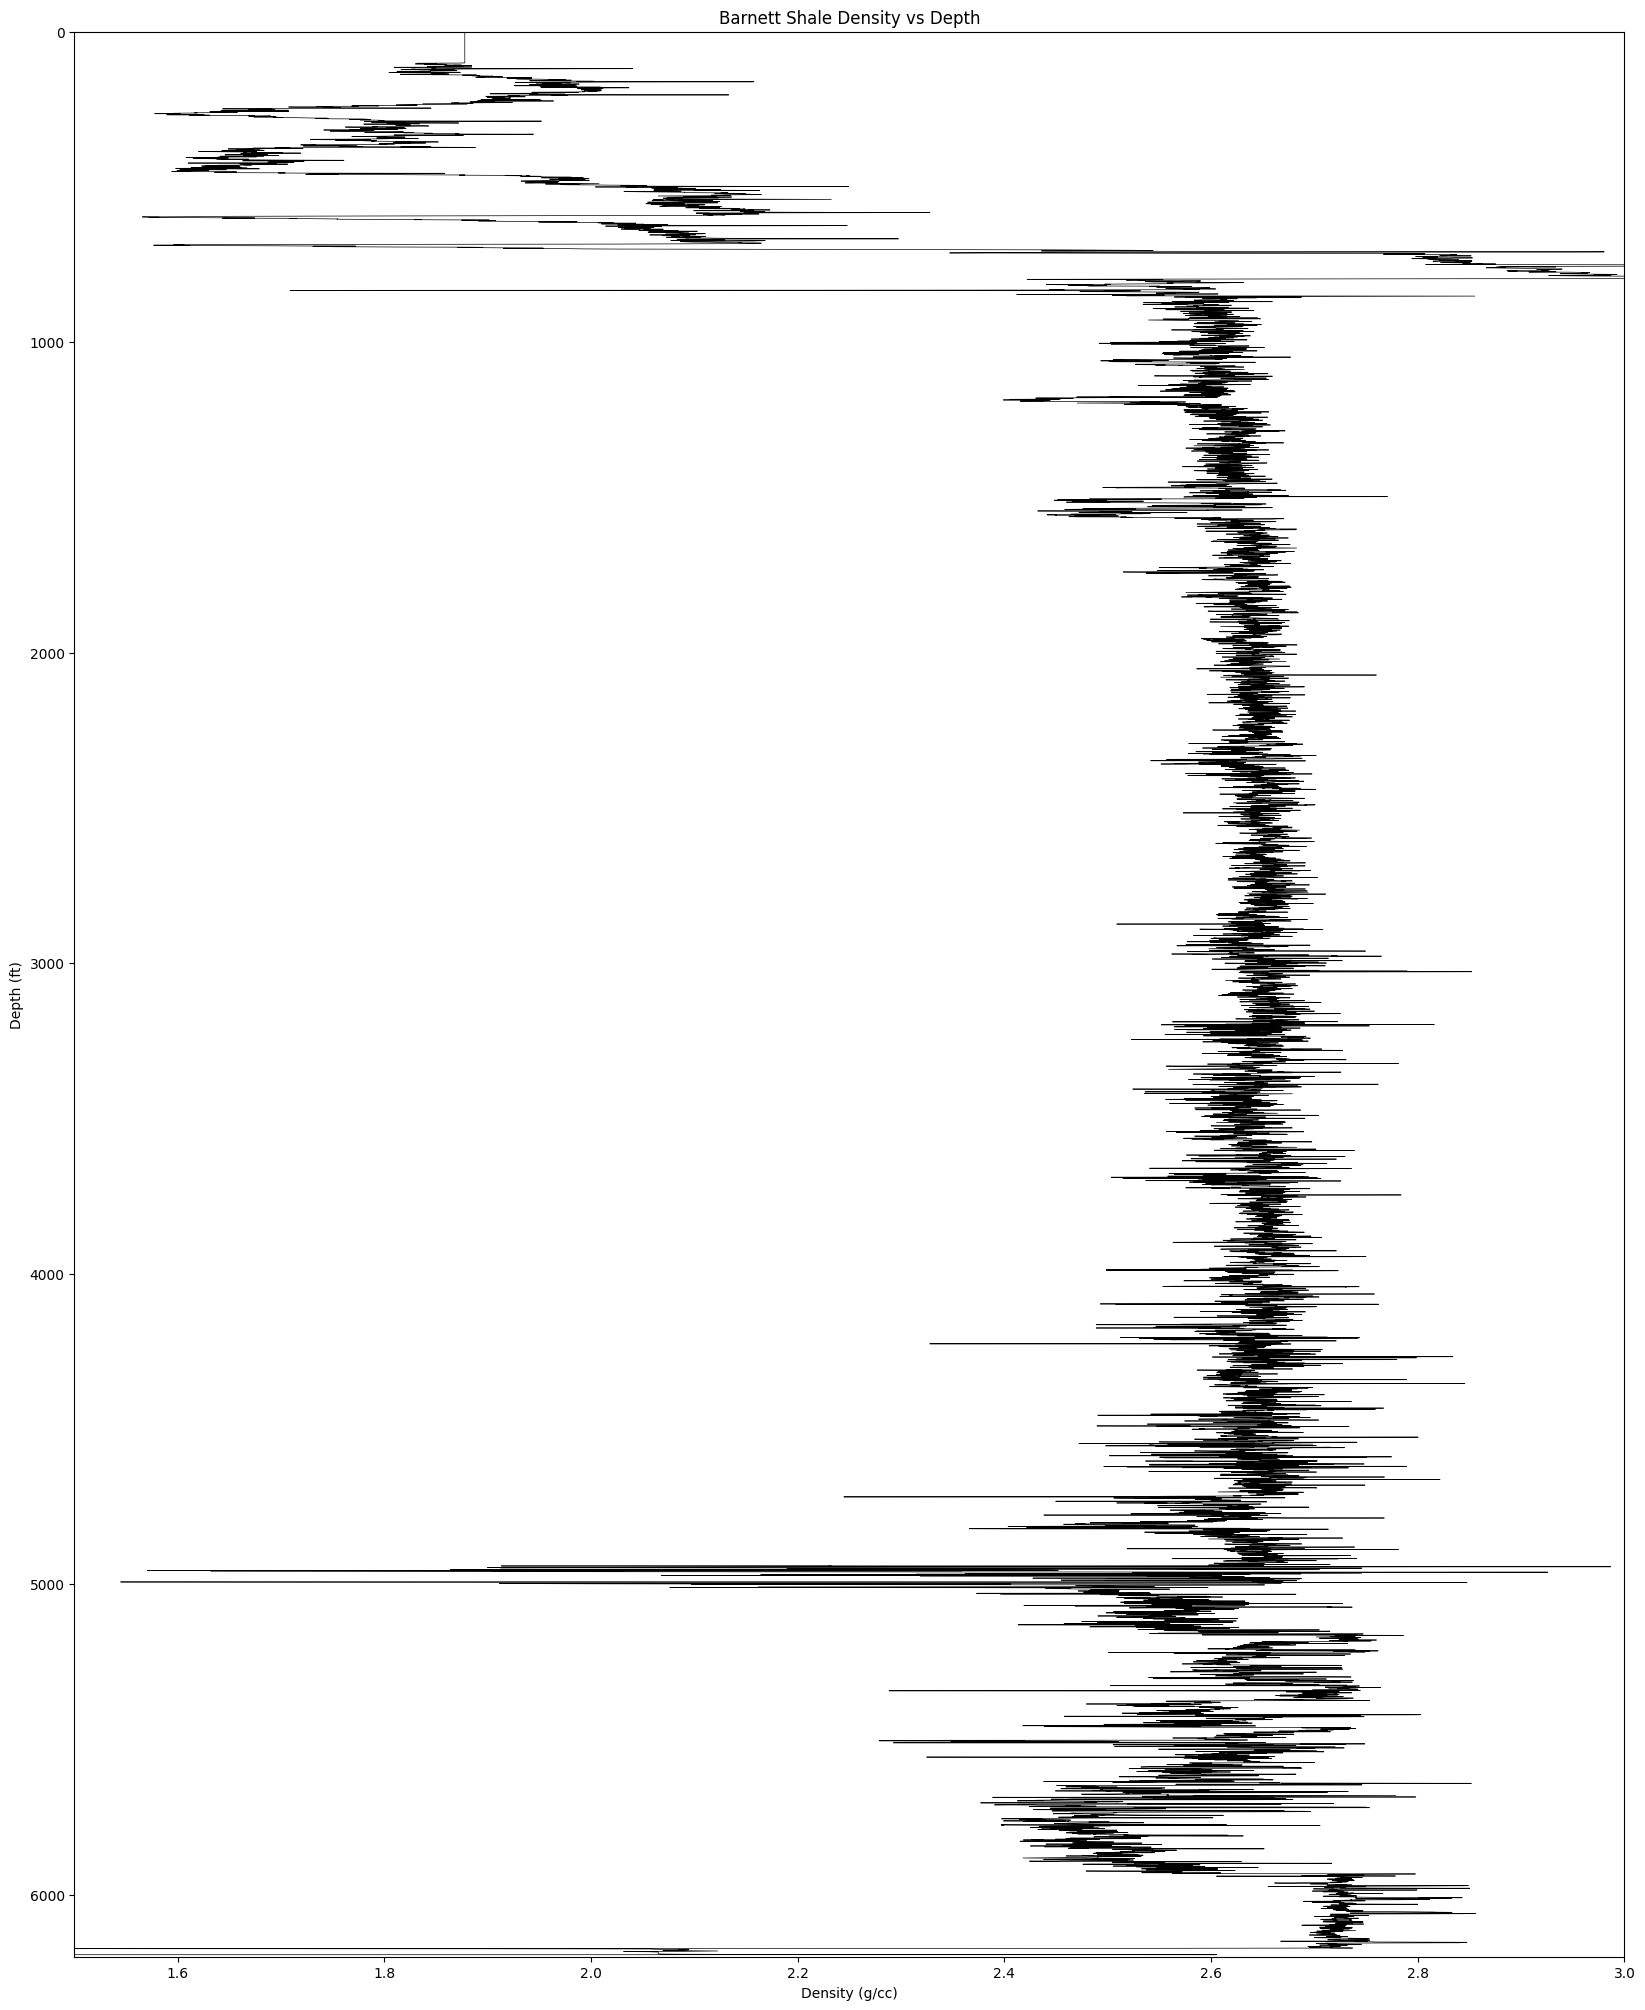

In [80]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Barnett_Shale_concat['Density (g/cc)'], Barnett_Shale_concat.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(1.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(6200, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Barnett Shale Density vs Depth')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

Question 1.a: Density Profiles
1/1 point (graded)
Refer to your density profiles for both data sets to answer these questions. Enter your answers in the blank without units.

What is the logged density in the Barnett Shale well at 4000 ft depth in g/cc?

In [81]:
value = Barnett_Shale_concat.loc[4000, 'Density (g/cc)']
print(value)

2.6606


Question 4.a: Porosity Profiles
0.0/1.0 point (graded)
Refer to your calculated porosity profiles for both data sets to answer these questions. Enter your answers in the blank without units as a number from 0 to 1 (not a percentage).

What is the porosity in the Barnett Shale well at 5300 ft depth?


In [82]:
x = Barnett_Shale_concat.loc[5300, 'porosity (%)']
print(x)

5.264705882352948


In [83]:
# Define the interval of depth (0,5 ft)
ft_interval_mexico = 0.5

# Calculate the total quantity of values to add
total_values_mexico_sea = int(1000 / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0,5
Depth_mexico_sea = [i * ft_interval_mexico for i in range(total_values_mexico_sea)]

# Create a list with densitys values 1.0
Density_mexico_sea = [1.0] * total_values_mexico_sea

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_mexico_sea = pd.DataFrame({
    'Depth(ft)': Depth_mexico_sea,
    'Density (g/cc)': Density_mexico_sea,
})

# See the dataframe
print(Barnett_Shale_top.head())



Golfo_mexico_sea = Golfo_mexico_sea.set_index('Depth(ft)')
# See the dataframeli
Golfo_mexico_sea.tail()
# Define the interval of depth (0.5 ft)
ft_interval_mexico = 0.5

# Calculate the total quantity of values to add
start_depth = 1000.5
end_depth = 3514.5
total_values_mexico_floor = int((end_depth - start_depth) / ft_interval_mexico) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 1000,5
Depth_mexico_floor = list(np.arange(start_depth, end_depth + ft_interval_mexico, ft_interval_mexico))

# Create a list with densitys values 1.0
Density_mexico_floor = [1.0] * total_values_mexico_floor

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_mexico_floor = pd.DataFrame({
    'Depth(ft)': Depth_mexico_floor,
    'Density (g/cc)': Density_mexico_floor,
})

# See the dataframe
print(Golfo_mexico_floor.head())

Golfo_mexico_floor = Golfo_mexico_floor.set_index('Depth(ft)')
# See the dataframe
Golfo_mexico_floor.tail()

           Density (g/cc)
Depth(ft)                
0.0                1.8778
0.5                1.8778
1.0                1.8778
1.5                1.8778
2.0                1.8778
   Depth(ft)  Density (g/cc)
0     1000.5             1.0
1     1001.0             1.0
2     1001.5             1.0
3     1002.0             1.0
4     1002.5             1.0


,Density (g/cc)
Depth(ft),
3512.5,1.0
3513.0,1.0
3513.5,1.0
3514.0,1.0
3514.5,1.0


In [84]:
#concat all data
Golfo_Mexico_full = pd.concat([Golfo_mexico_sea, Golfo_mexico_floor, Golfo_Mexico])
print(Golfo_Mexico_full)

           Density (g/cc)
Depth(ft)                
0.0                 1.000
0.5                 1.000
1.0                 1.000
1.5                 1.000
2.0                 1.000
...                   ...
13096.0             2.314
13097.0             2.314
13098.0             2.294
13099.0             2.294
13100.0             2.279

[16616 rows x 1 columns]


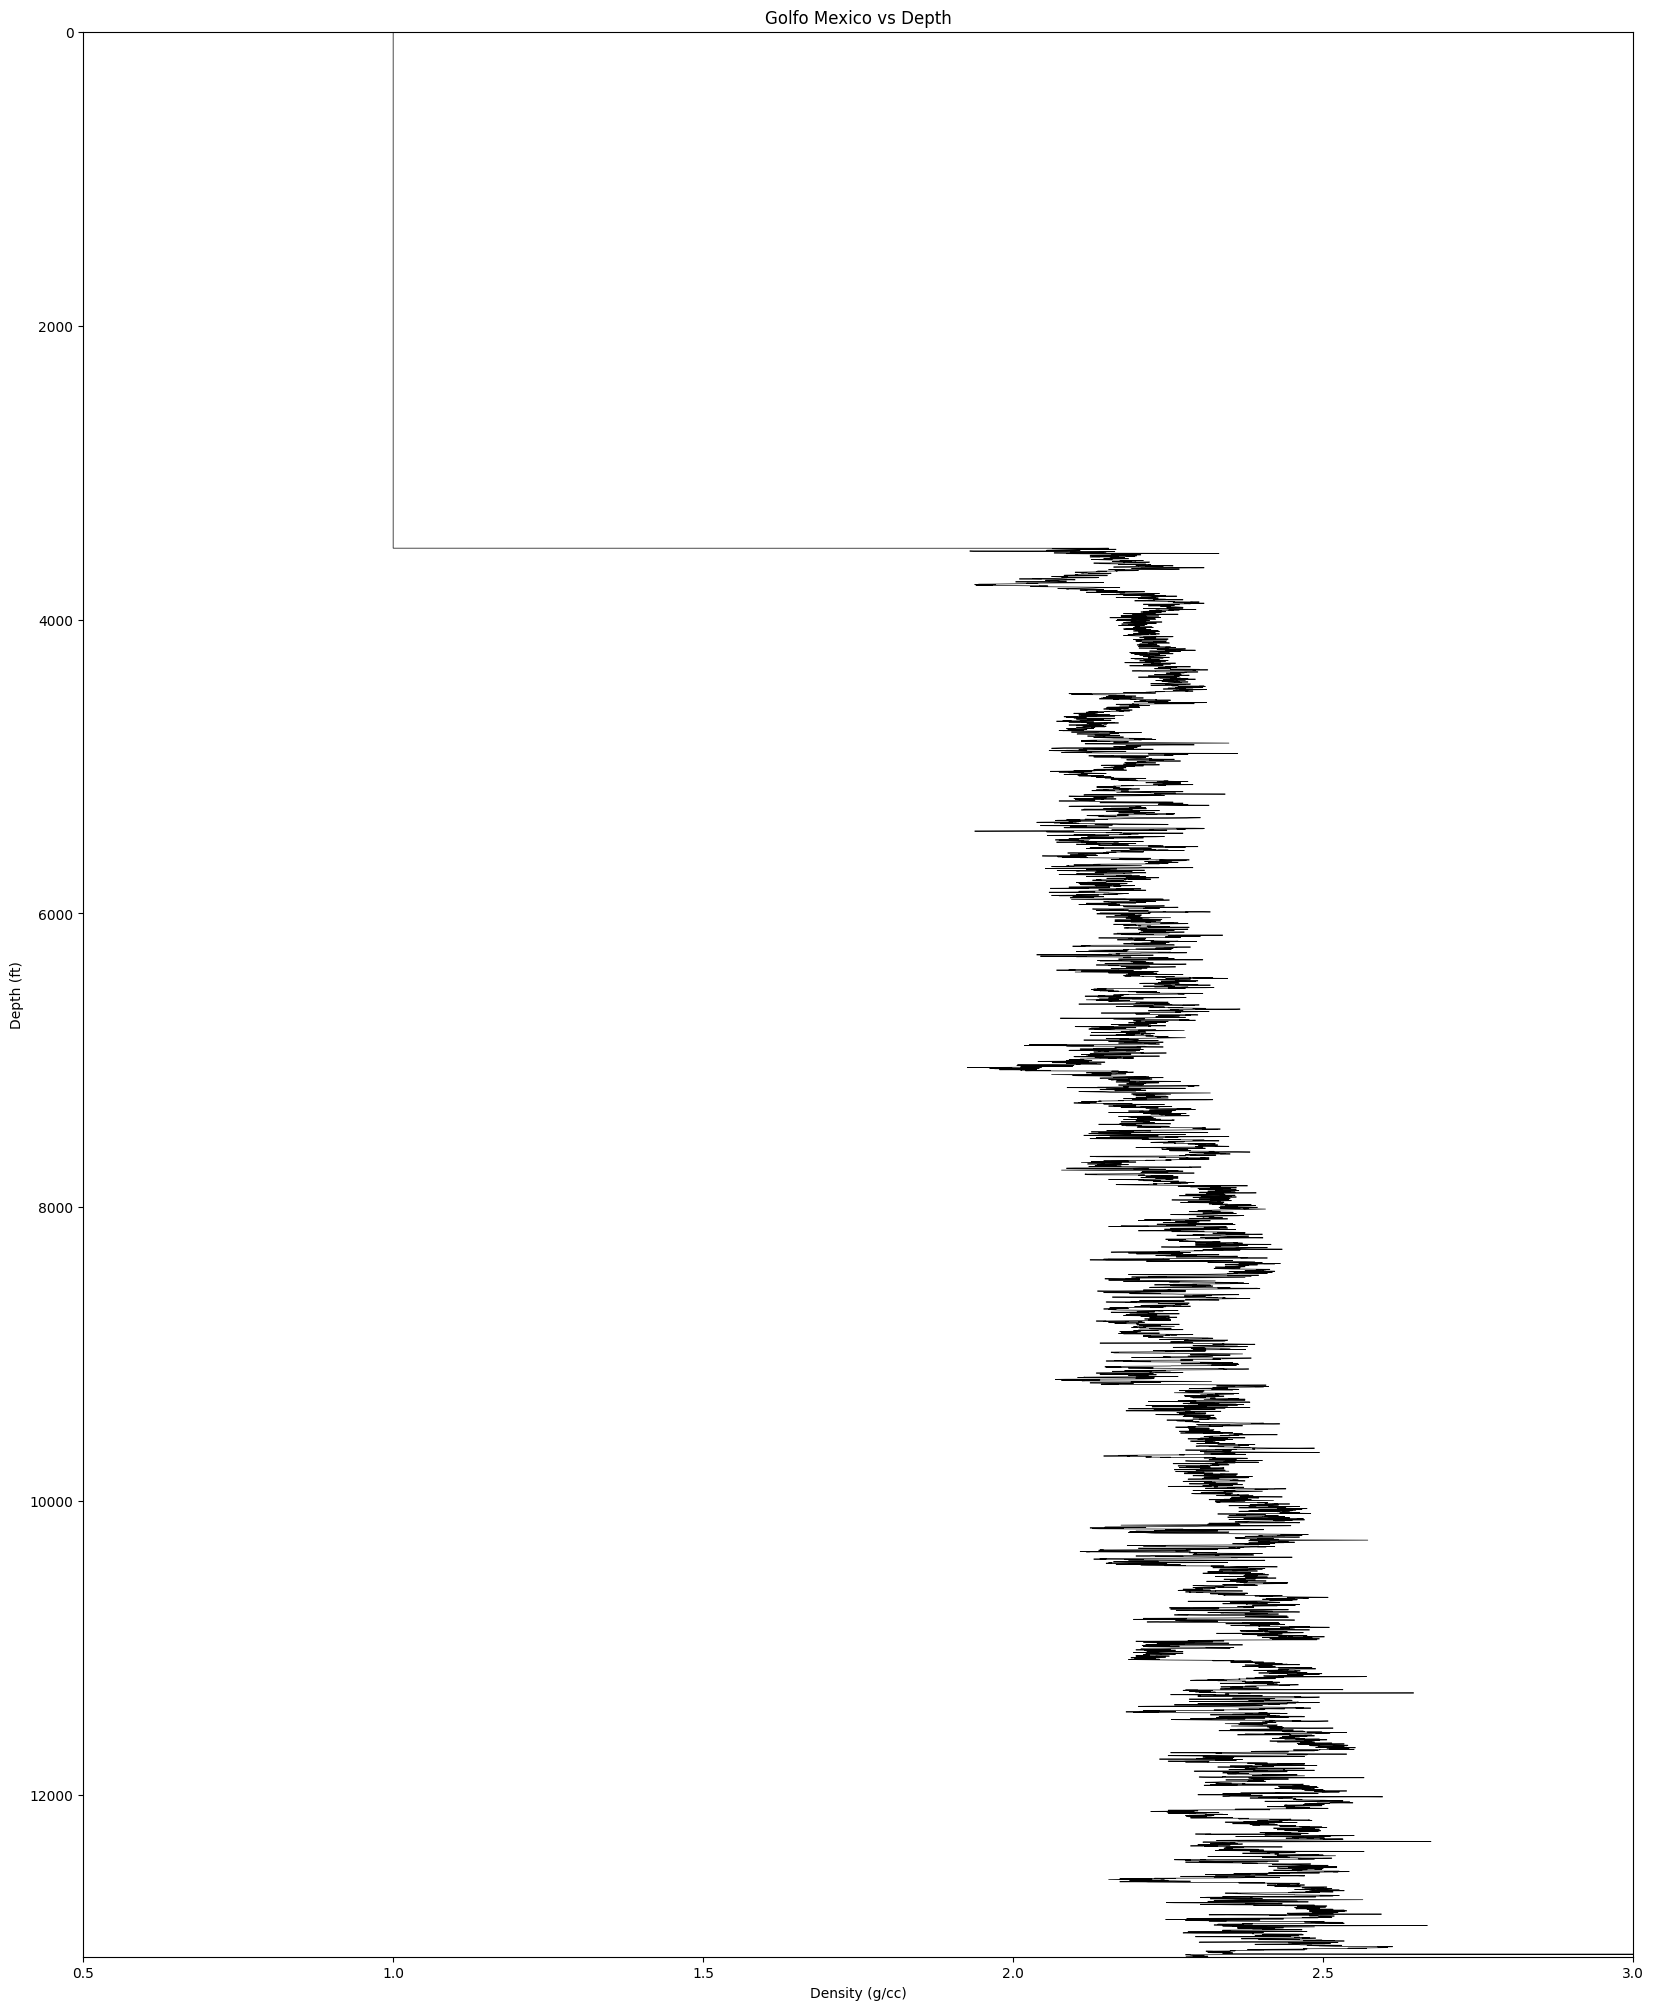

In [85]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico_full['Density (g/cc)'], Golfo_Mexico_full.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(0.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(13100, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Golfo Mexico vs Depth')


# Show the graphic
plt.show()

In [86]:
#Calculate the porosity
#Define the premises
ρf = 1.0 # an average approximation of the fluid density of the rock
ρm = 2.7 # an average approximation of the pure rock density (no pores)
#set NaN values
Golfo_Mexico_full['Density (g/cc)'] = Golfo_Mexico_full['Density (g/cc)'].replace(-999.0000, np.nan)
# defines the formula, in the values below 2.0 I discarded the calculation because there are no rocks with such low density
def calculate_porosity(x):
    if x < 2.0:
        return np.nan
    else:
        return ((x - ρm) / (ρf - ρm)) *100

Golfo_Mexico_full['porosity (%)'] = Golfo_Mexico_full['Density (g/cc)'].apply(calculate_porosity)

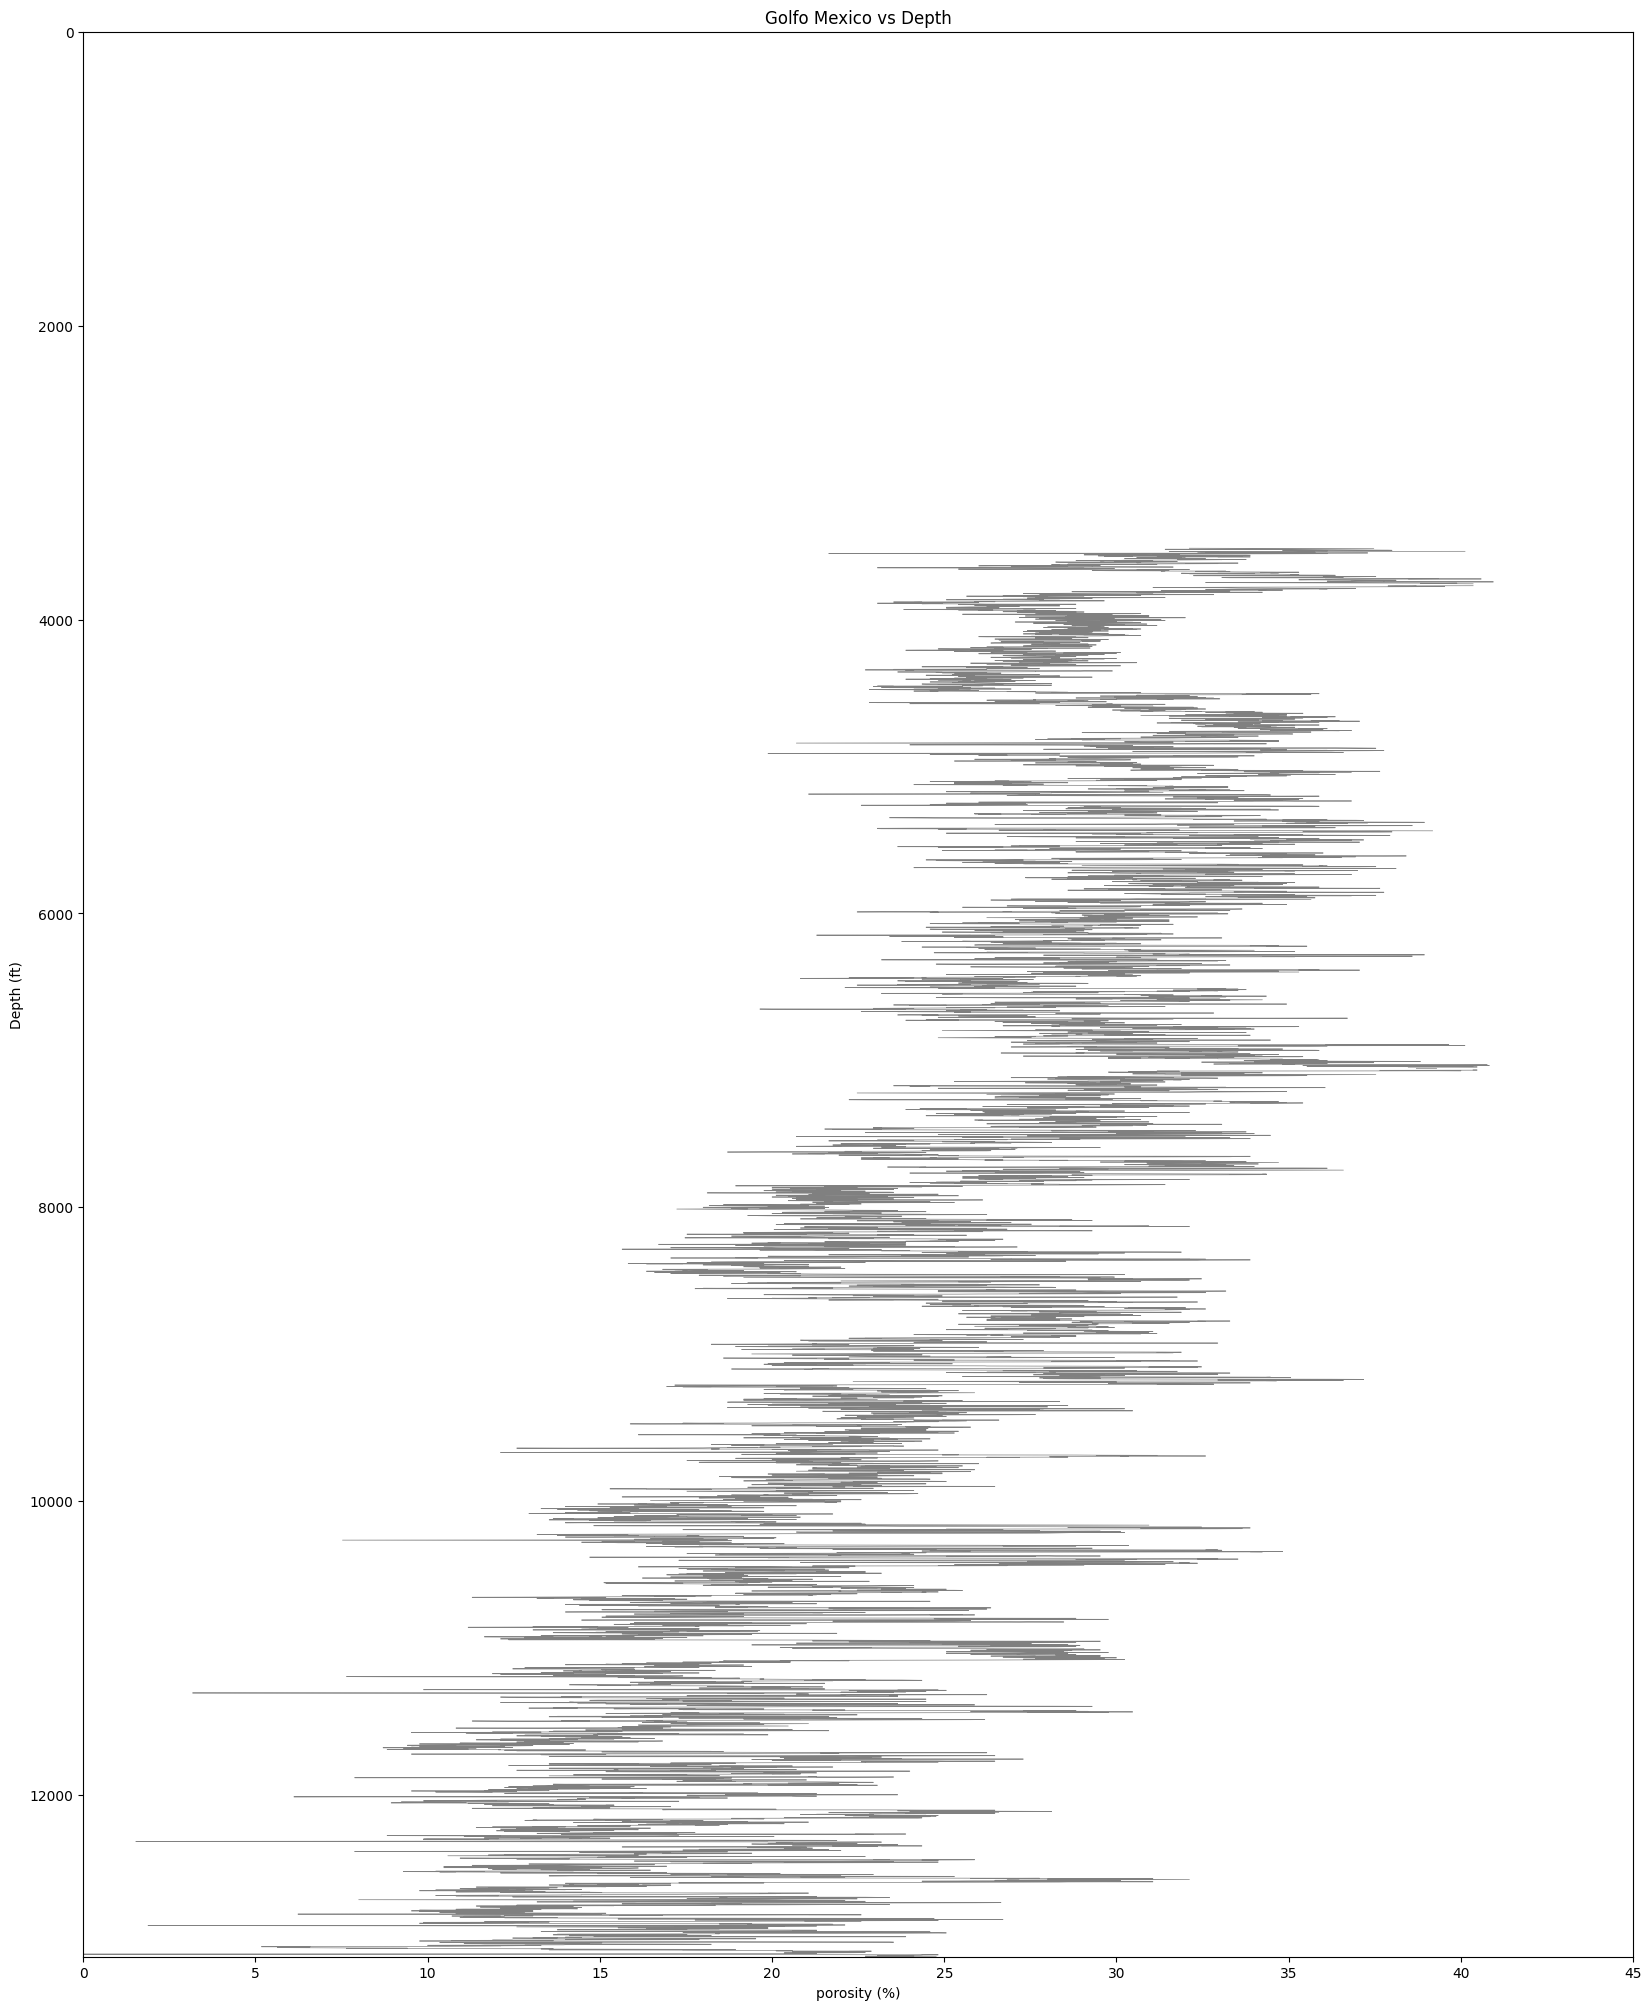

In [87]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico_full['porosity (%)'], Golfo_Mexico_full.index, linewidth=0.5, color='gray')

# Set the limits for the x and y axis
plt.xlim(0, 45)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(13100, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('porosity (%)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Golfo Mexico vs Depth')


# Show the graphic
plt.show()

Question 1.b: Density Profiles
---
0.0/1.0 point (graded)
Refer to your density profiles for both data sets to answer these questions. Enter your answers in the blank without units.

What is the logged density in the Gulf of Mexico well at 8600 ft depth in g/cc?



In [88]:
value_mexico = Golfo_Mexico_full.loc[8600, 'Density (g/cc)']
print(value_mexico)

2.294


Question 4.b: Porosity Profiles
---
0.0/1.0 point (graded)
Refer to your calculated porosity profiles for both data sets to answer these questions. Enter your answers in the blank without units as a number from 0 to 1 (not a percentage).

What is the porosity in the Gulf of Mexico well at 8200 ft depth?

In [89]:
x = Golfo_Mexico_full.loc[8200, 'porosity (%)']
print(x)

19.764705882352956


In [90]:
# "Block" the log in 5 depth units
Barnett_Shale_concat['DepthGroup'] = pd.qcut(Barnett_Shale_concat.index, 5)
# Calcule a média da coluna 'Density (g/cc)' para cada grupo
average_density = Barnett_Shale_concat.groupby('DepthGroup')['Density (g/cc)'].mean()

print(average_density)

DepthGroup
(-0.001, 1239.7]    2.215391
(1239.7, 2479.4]    2.630061
(2479.4, 3719.1]    2.645213
(3719.1, 4958.8]    2.634786
(4958.8, 6198.5]   -1.439716
Name: Density (g/cc), dtype: float64


In [91]:
# Calculate depth max for all blocks
max_depth = Barnett_Shale_concat.groupby('DepthGroup').apply(lambda x: x.index.max())

print(max_depth)

DepthGroup
(-0.001, 1239.7]    1239.5
(1239.7, 2479.4]    2479.0
(2479.4, 3719.1]    3719.0
(3719.1, 4958.8]    4958.5
(4958.8, 6198.5]    6198.5
dtype: float64


In [92]:
print(Barnett_Shale_concat.loc[Barnett_Shale_concat['DepthGroup'] == Barnett_Shale_concat['DepthGroup'].unique()[-1], 'Density (g/cc)'])

Depth(ft)
4959.0      2.0316
4959.5      1.9048
4960.0      2.0311
4960.5      2.2600
4961.0      2.7292
            ...   
6196.5   -999.0000
6197.0   -999.0000
6197.5   -999.0000
6198.0   -999.0000
6198.5   -999.0000
Name: Density (g/cc), Length: 2480, dtype: float64


In [93]:
# calculate depth max of blocks
max_depth = Barnett_Shale_concat.groupby('DepthGroup').apply(lambda x: x.index.max())

print(max_depth)

DepthGroup
(-0.001, 1239.7]    1239.5
(1239.7, 2479.4]    2479.0
(2479.4, 3719.1]    3719.0
(3719.1, 4958.8]    4958.5
(4958.8, 6198.5]    6198.5
dtype: float64


In [94]:
# Define the interval of depth (0.5 ft)
ft_interval = 0.5

# Calculate the total quantity of values to add
start_depth = 0
end_depth = 1239.5
total_values = int((end_depth - start_depth) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth = list(np.arange(start_depth, end_depth + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density = [2.215391] * total_values

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_block_1 = pd.DataFrame({
    'Depth(ft)': Depth,
    'Density (g/cc)': Density,
})

# See the dataframe
print(Barnett_Shale_block_1)

#Second block

# Calculate the total quantity of values to add
start_depth_2 = 1240
end_depth_2 = 2478.5
total_values_2 = int((end_depth_2 - start_depth_2) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_2 = list(np.arange(start_depth_2, end_depth_2 + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density_2 = [2.630061] * total_values_2

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_block_2 = pd.DataFrame({
    'Depth(ft)': Depth_2,
    'Density (g/cc)': Density_2,
})

#Third Block

# See the dataframe
print(Barnett_Shale_block_2)
# Block 3
# Calculate the total quantity of values to add
start_depth_3 = 2479
end_depth_3 = 3718.5
total_values_3 = int((end_depth_3 - start_depth_3) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_3 = list(np.arange(start_depth_3, end_depth_3 + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density_3 = [2.645213] * total_values_3

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_block_3 = pd.DataFrame({
    'Depth(ft)': Depth_3,
    'Density (g/cc)': Density_3,
})

# See the dataframe
print(Barnett_Shale_block_3)

#Fourth Block

# Calculate the total quantity of values to add
start_depth_4 = 3719
end_depth_4 =  4958
total_values_4 = int((end_depth_4 - start_depth_4) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_4 = list(np.arange(start_depth_4, end_depth_4 + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density_4 = [2.634786] * total_values_4

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_block_4 = pd.DataFrame({
    'Depth(ft)': Depth_4,
    'Density (g/cc)': Density_4,
})

# See the dataframe
print(Barnett_Shale_block_4)

#Five Block

# Calculate the total quantity of values to add
start_depth_5 = 4958.5
end_depth_5 =  6198.5
total_values_5 = int((end_depth_5 - start_depth_5) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_5 = list(np.arange(start_depth_5, end_depth_5 + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density_5 = [2.598990] * total_values_5

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Barnett_Shale_block_5 = pd.DataFrame({
    'Depth(ft)': Depth_5,
    'Density (g/cc)': Density_5,
})

# See the dataframe
print(Barnett_Shale_block_5)

Barnett_Shale_blocks = pd.concat([Barnett_Shale_block_1, Barnett_Shale_block_2, Barnett_Shale_block_3, Barnett_Shale_block_4, Barnett_Shale_block_5])
Barnett_Shale_blocks = Barnett_Shale_blocks.set_index('Depth(ft)')

      Depth(ft)  Density (g/cc)
0           0.0        2.215391
1           0.5        2.215391
2           1.0        2.215391
3           1.5        2.215391
4           2.0        2.215391
...         ...             ...
2475     1237.5        2.215391
2476     1238.0        2.215391
2477     1238.5        2.215391
2478     1239.0        2.215391
2479     1239.5        2.215391

[2480 rows x 2 columns]
      Depth(ft)  Density (g/cc)
0        1240.0        2.630061
1        1240.5        2.630061
2        1241.0        2.630061
3        1241.5        2.630061
4        1242.0        2.630061
...         ...             ...
2473     2476.5        2.630061
2474     2477.0        2.630061
2475     2477.5        2.630061
2476     2478.0        2.630061
2477     2478.5        2.630061

[2478 rows x 2 columns]
      Depth(ft)  Density (g/cc)
0        2479.0        2.645213
1        2479.5        2.645213
2        2480.0        2.645213
3        2480.5        2.645213
4        2481.0       

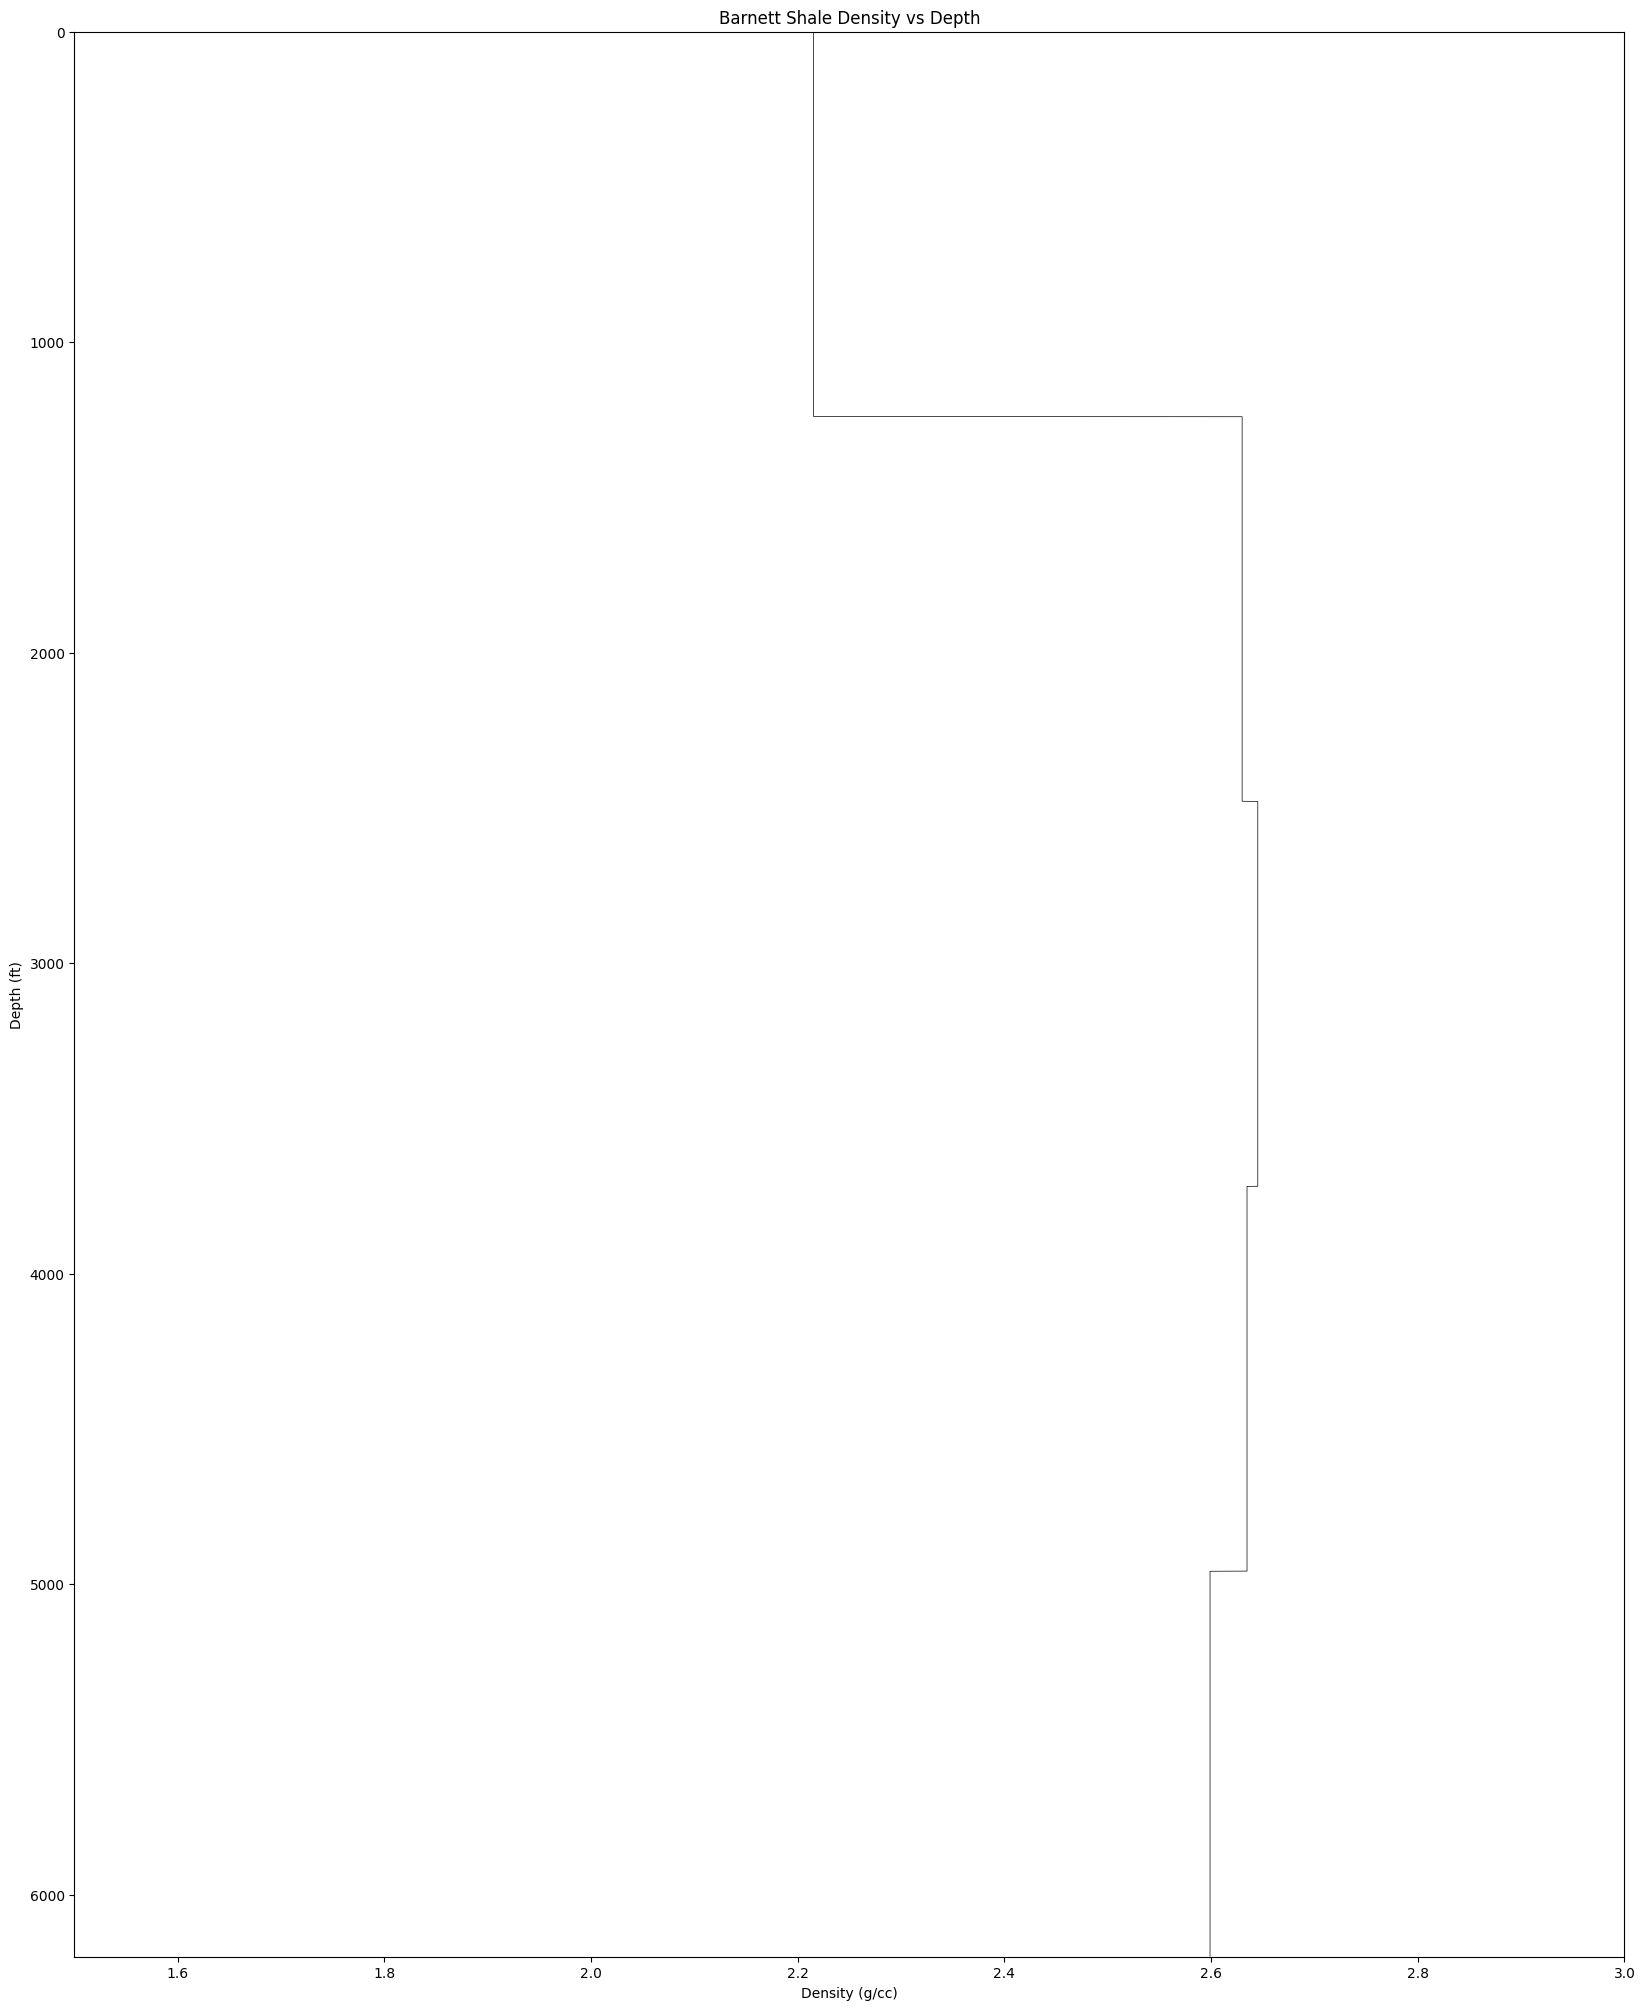

In [95]:
#see data blcks
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Barnett_Shale_blocks['Density (g/cc)'], Barnett_Shale_blocks.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(1.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(6200, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Barnett Shale Density vs Depth')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

In [96]:
# Substitute -999.0000 to na values
Golfo_Mexico_full['Density (g/cc)'] = Golfo_Mexico_full['Density (g/cc)'].replace(-999.0000, np.nan)
# "Block" the log in 5 depth units
Golfo_Mexico_full['DepthGroup'] = pd.qcut(Golfo_Mexico_full.index, 5)
# Calcule a média da coluna 'Density (g/cc)' para cada grupo
average_density_mexico = Golfo_Mexico_full.groupby('DepthGroup')['Density (g/cc)'].mean()

print(average_density_mexico)

# Calculate depth max for all blocks
max_depth_mexico = Golfo_Mexico_full.groupby('DepthGroup').apply(lambda x: x.index.max())

print(max_depth_mexico)

DepthGroup
(-0.001, 1661.5]     1.000000
(1661.5, 3323.0]     1.000000
(3323.0, 6454.0]     2.047127
(6454.0, 9777.0]     2.253959
(9777.0, 13100.0]    2.384227
Name: Density (g/cc), dtype: float64
DepthGroup
(-0.001, 1661.5]      1661.5
(1661.5, 3323.0]      3323.0
(3323.0, 6454.0]      6454.0
(6454.0, 9777.0]      9777.0
(9777.0, 13100.0]    13100.0
dtype: float64


In [97]:
#create a new data
#Block 1
# Calculate the total quantity of values to add
start_depth_m1 = 0
end_depth_m1 = 1661.5
total_values_m1 = int((end_depth_m1 - start_depth_m1) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_m1 = list(np.arange(start_depth_m1, end_depth_m1 + ft_interval, ft_interval))

# Create a list with densitys values 2.215391
Density_m1 = [1.0] * total_values_m1

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_Mexico_block_1 = pd.DataFrame({
    'Depth(ft)': Depth_m1,
    'Density (g/cc)': Density_m1,
})
#Block 2
# Calculate the total quantity of values to add
start_depth_m2 = 1662
end_depth_m2 = 3323
total_values_m2 = int((end_depth_m2 - start_depth_m2) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_m2 = list(np.arange(start_depth_m2, end_depth_m2 + ft_interval, ft_interval))

# Create a list with densitys values 1.0
Density_m2 = [1.0] * total_values_m2

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_Mexico_block_2 = pd.DataFrame({
    'Depth(ft)': Depth_m2,
    'Density (g/cc)': Density_m2,
})

#Block 3
# Calculate the total quantity of values to add
start_depth_m3 = 3323.5
end_depth_m3 = 6454
total_values_m3 = int((end_depth_m3 - start_depth_m3) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_m3 = list(np.arange(start_depth_m3, end_depth_m3 + ft_interval, ft_interval))

# Create a list with densitys values 1.0
Density_m3 = [2.047127] * total_values_m3

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_Mexico_block_3 = pd.DataFrame({
    'Depth(ft)': Depth_m3,
    'Density (g/cc)': Density_m3,})

#Block 4
# Calculate the total quantity of values to add
start_depth_m4 = 6454.5
end_depth_m4 = 9777
total_values_m4 = int((end_depth_m4 - start_depth_m4) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_m4 = list(np.arange(start_depth_m4, end_depth_m4 + ft_interval, ft_interval))

# Create a list with densitys values
Density_m4 = [2.253959] * total_values_m4

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_Mexico_block_4 = pd.DataFrame({
    'Depth(ft)': Depth_m4,
    'Density (g/cc)': Density_m4,})

#Block 5
# Calculate the total quantity of values to add
start_depth_m5 = 9777.5
end_depth_m5 = 13100
total_values_m5 = int((end_depth_m5 - start_depth_m5) / ft_interval) + 1

# Criar uma lista de profundidades em intervalos regulares de 0,5 ft, começando do valor 0
Depth_m5 = list(np.arange(start_depth_m5, end_depth_m5 + ft_interval, ft_interval))

# Create a list with densitys values
Density_m5 = [2.384227] * total_values_m5

# Create the dataframe columns 'Depth(ft)' e 'Density (g/cc)'
Golfo_Mexico_block_5 = pd.DataFrame({
    'Depth(ft)': Depth_m5,
    'Density (g/cc)': Density_m5,})

Golfo_Mexico_blocks = pd.concat([Golfo_Mexico_block_1, Golfo_Mexico_block_2, Golfo_Mexico_block_3, Golfo_Mexico_block_4, Golfo_Mexico_block_5])
Golfo_Mexico_blocks = Golfo_Mexico_blocks.set_index('Depth(ft)')

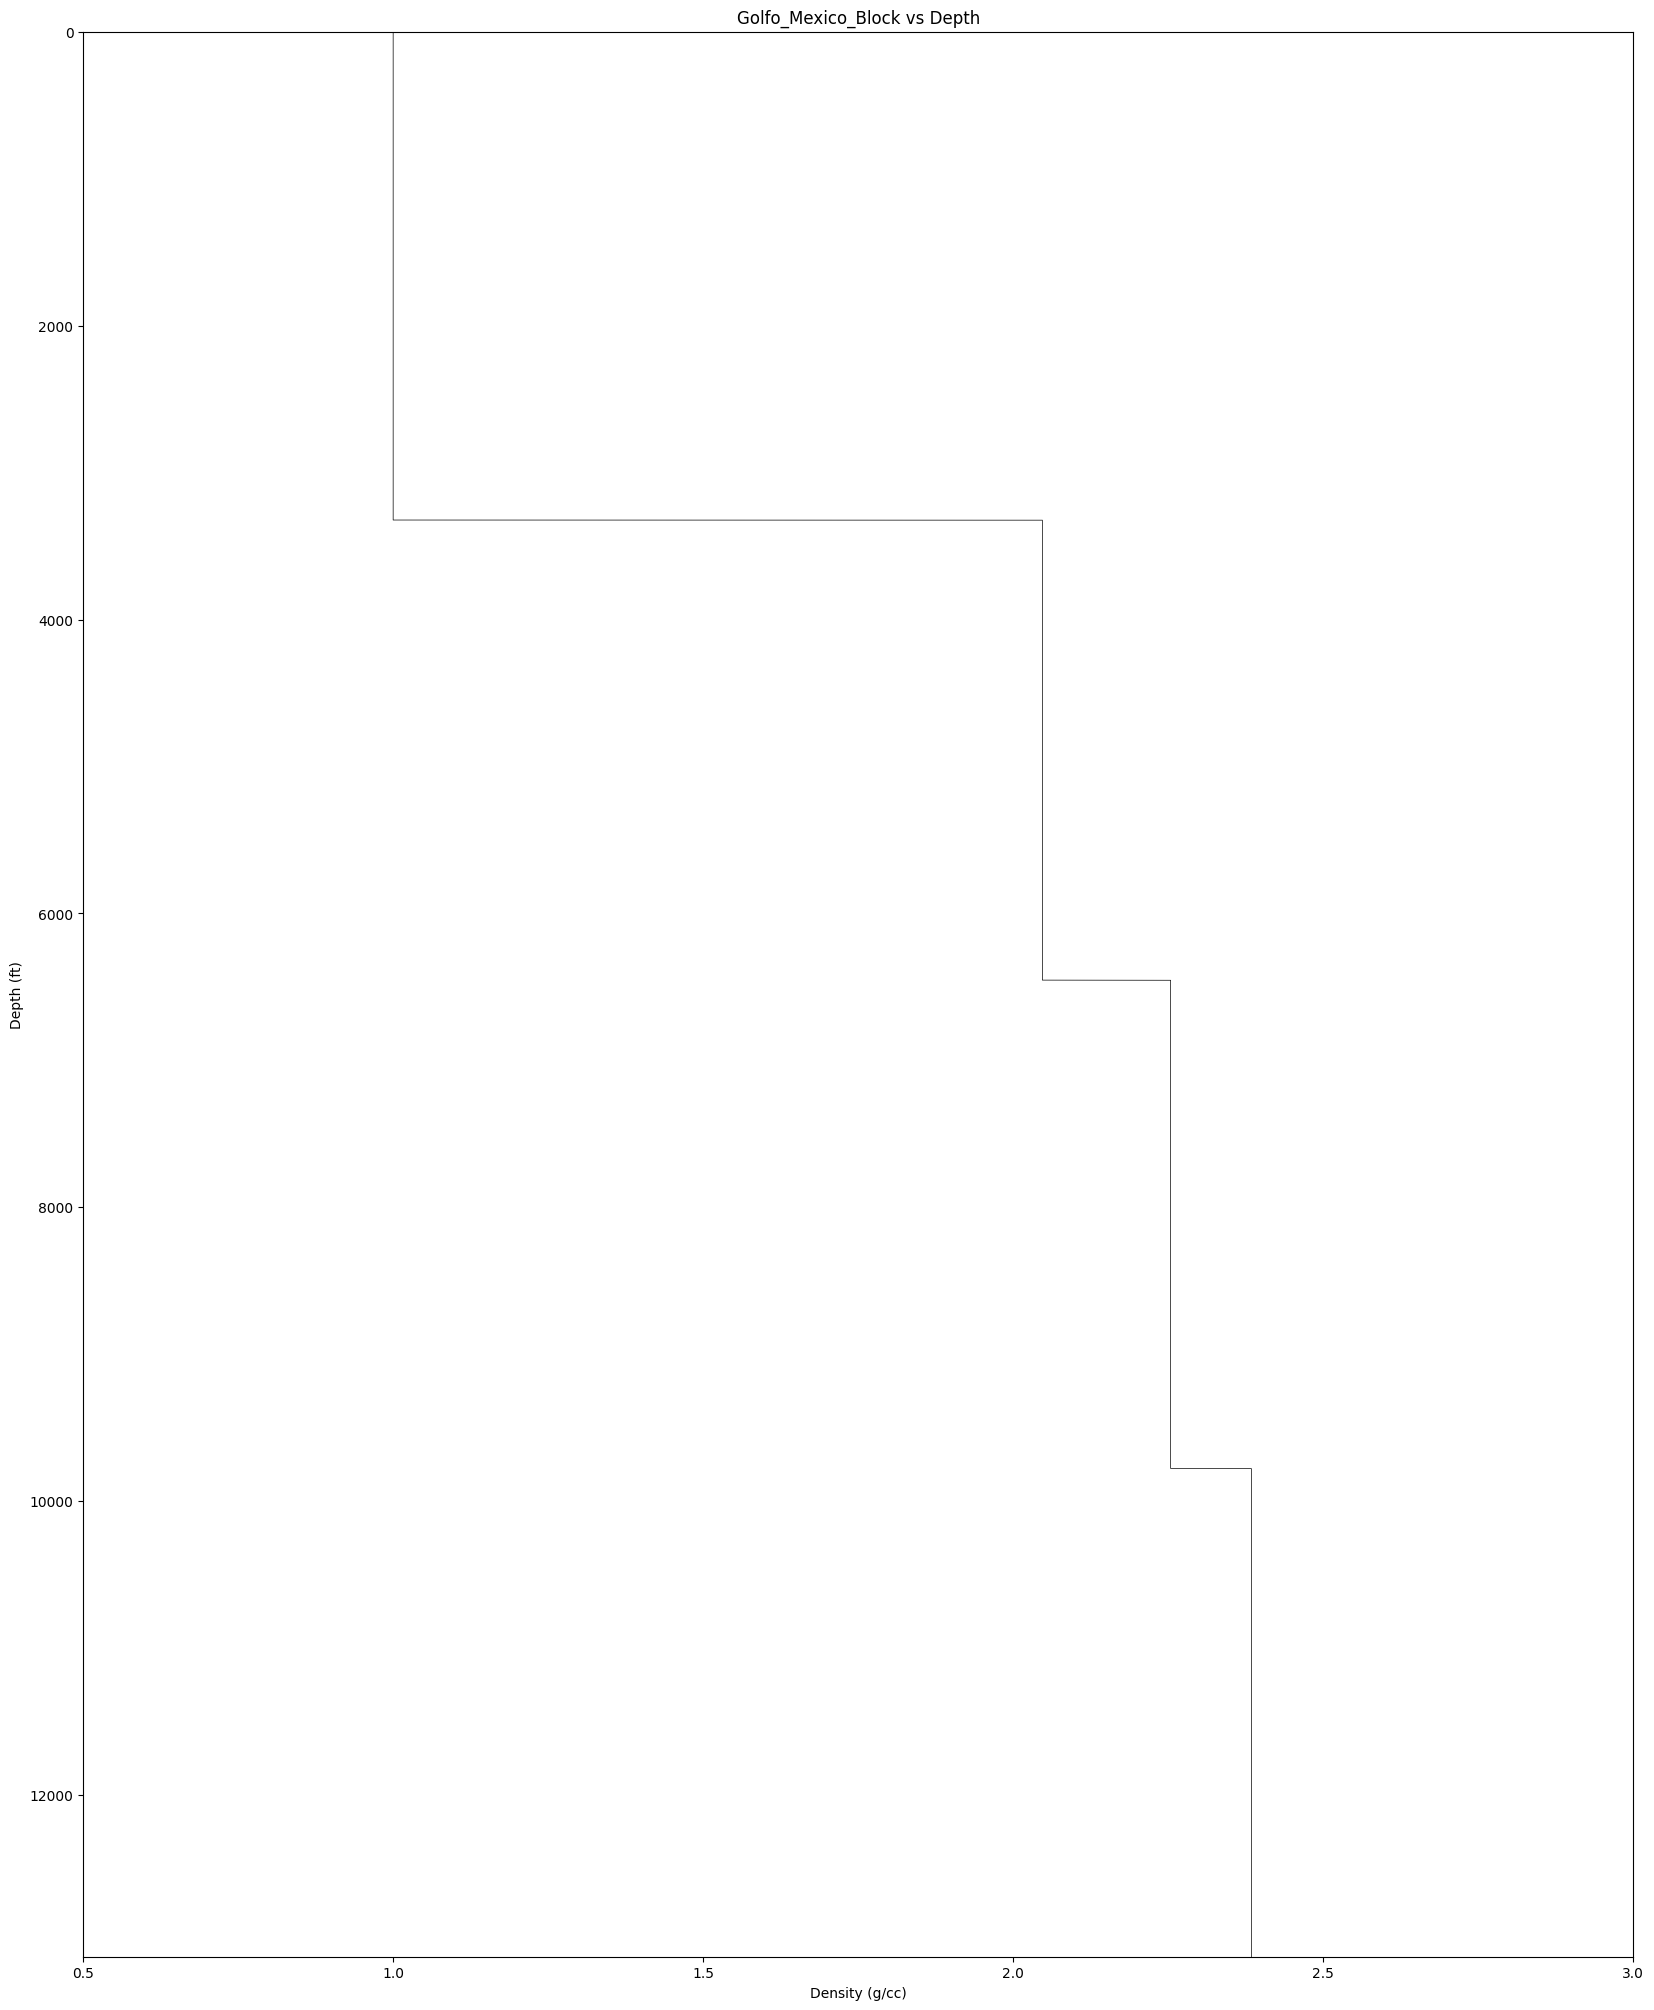

In [98]:
#see data blcks
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico_blocks['Density (g/cc)'], Golfo_Mexico_blocks.index, linewidth=0.5, color='black')

# Set the limits for the x and y axis
plt.xlim(0.5, 3.0)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(13100, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth (ft)')

# Set title for the plot
plt.title('Golfo_Mexico_Block vs Depth')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

In [99]:
#change density Density (g/cc to Kg/m³
for i in range(0, len(Barnett_Shale_blocks)):
    Barnett_Shale_blocks.iloc[i, Barnett_Shale_blocks.columns.get_loc('Density (g/cc)')] = Barnett_Shale_blocks.iloc[i, Barnett_Shale_blocks.columns.get_loc('Density (g/cc)')] * 1000



In [100]:
#change density Depth ft to Depth m
Barnett_Shale_blocks.index = Barnett_Shale_blocks.index * 0.3048

In [101]:
Barnett_Shale_blocks.head()

,Density (g/cc)
Depth(ft),
0.0000,2215.391
0.1524,2215.391
0.3048,2215.391
0.4572,2215.391
0.6096,2215.391


In [102]:
#rename the column
Barnett_Shale_blocks = Barnett_Shale_blocks.rename(columns={'Density (g/cc)': 'Density (Kg/m³)'})
# Reset index to make index into column
Barnett_Shale_blocks.reset_index(level=0, inplace=True)

# Rename the column
Barnett_Shale_blocks = Barnett_Shale_blocks.rename(columns={'Depth(ft)': 'Depth(m)'})
Barnett_Shale_blocks.set_index('Depth(m)', inplace=True)



In [103]:
# Create a new column 'Stress' com todos os valores como NaN
Barnett_Shale_blocks['Stress (MPascal)'] = np.nan

# Calculate the first stress value
Barnett_Shale_blocks.iloc[1, Barnett_Shale_blocks.columns.get_loc('Stress (MPascal)')] = (Barnett_Shale_blocks.index[2] - Barnett_Shale_blocks.index[1]) * Barnett_Shale_blocks.iloc[1, Barnett_Shale_blocks.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000

# Create a loop to calculate the stress
for i in range(2, len(Barnett_Shale_blocks)):
    Barnett_Shale_blocks.iloc[i, Barnett_Shale_blocks.columns.get_loc('Stress (MPascal)')] = ((Barnett_Shale_blocks.index[i] - Barnett_Shale_blocks.index[i-1]) * Barnett_Shale_blocks.iloc[i-1, Barnett_Shale_blocks.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000) + Barnett_Shale_blocks.iloc[i-1, Barnett_Shale_blocks.columns.get_loc('Stress (MPascal)')]


In [104]:
#see data
print(Barnett_Shale_blocks)

           Density (Kg/m³)  Stress (MPascal)
Depth(m)                                    
0.0000            2215.391               NaN
0.1524            2215.391          0.003309
0.3048            2215.391          0.006617
0.4572            2215.391          0.009926
0.6096            2215.391          0.013235
...                    ...               ...
1888.6932         2598.990         47.103116
1888.8456         2598.990         47.106998
1888.9980         2598.990         47.110879
1889.1504         2598.990         47.114761
1889.3028         2598.990         47.118642

[12398 rows x 2 columns]


In [105]:
# set NaN values
Barnett_Shale_concat = Barnett_Shale_concat.replace(-999.0, np.NaN)


In [106]:
#see the difference
Barnett_Shale_concat.tail()

,Density (g/cc),porosity (%),DepthGroup
Depth(ft),,,
6196.5,NaN,NaN,"(4958.8, 6198.5]"
6197.0,NaN,NaN,"(4958.8, 6198.5]"
6197.5,NaN,NaN,"(4958.8, 6198.5]"
6198.0,NaN,NaN,"(4958.8, 6198.5]"
6198.5,NaN,NaN,"(4958.8, 6198.5]"


In [107]:
#rename the column
Barnett_Shale_concat = Barnett_Shale_concat.rename(columns={'Density (g/cc)': 'Density (Kg/m³)'})
# Reset index to make index into column
Barnett_Shale_concat.reset_index(level=0, inplace=True)

# Rename the column
Barnett_Shale_concat = Barnett_Shale_concat.rename(columns={'Depth(ft)': 'Depth(m)'})
Barnett_Shale_concat.set_index('Depth(m)', inplace=True)

In [108]:
#change density Depth ft to Depth m
Barnett_Shale_concat.index = Barnett_Shale_concat.index * 0.3048

In [109]:
#change density Density (g/cc to Kg/m³
for i in range(0, len(Barnett_Shale_blocks)):
    Barnett_Shale_concat.iloc[i, Barnett_Shale_concat.columns.get_loc('Density (Kg/m³)')] = Barnett_Shale_concat.iloc[i, Barnett_Shale_concat.columns.get_loc('Density (Kg/m³)')] * 1000

In [110]:
# Create a new column 'Stress' com todos os valores como NaN
Barnett_Shale_concat['Stress (MPascal)'] = np.nan

# Calculate the first stress value
Barnett_Shale_concat.iloc[1, Barnett_Shale_concat.columns.get_loc('Stress (MPascal)')] = (Barnett_Shale_concat.index[2] - Barnett_Shale_concat.index[1]) * Barnett_Shale_concat.iloc[1, Barnett_Shale_concat.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000

# Create a loop to calculate the stress
for i in range(2, len(Barnett_Shale_blocks)):
    Barnett_Shale_concat.iloc[i, Barnett_Shale_concat.columns.get_loc('Stress (MPascal)')] = ((Barnett_Shale_concat.index[i] - Barnett_Shale_concat.index[i-1]) * Barnett_Shale_concat.iloc[i-1, Barnett_Shale_concat.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000) + Barnett_Shale_concat.iloc[i-1, Barnett_Shale_concat.columns.get_loc('Stress (MPascal)')]





In [111]:

# Define the interval in feet
ft_interval = 0.5

# Calculate the total quantity of values to add
start_depth_pore_pressure = 0
end_depth_pore_pressure = 18000
total_values_pore_pressure = int((end_depth_pore_pressure - start_depth_pore_pressure) / ft_interval) + 1

# Generate list of depth values
depth_values = list(np.arange(start_depth_pore_pressure, end_depth_pore_pressure + ft_interval, ft_interval))

# Create a list with density values that increase 0.44 per 1 ft, starting from 1.0
start_stress_pore_pressure = 0.0
stress_interval_pore_pressure = 0.0015168466016 # convert to MPascal
Stress_pore_pressure = list(np.arange(start_stress_pore_pressure, start_stress_pore_pressure + total_values_pore_pressure * stress_interval_pore_pressure, stress_interval_pore_pressure))

# Ensure same lengths of depth and stress lists
if len(depth_values) != len(Stress_pore_pressure):
    Stress_pore_pressure = Stress_pore_pressure[:len(depth_values)]

# Create the columns of the dataframe 'Depth(ft)' and 'Density (g/cc)'
pore_pressure = pd.DataFrame({
    'Depth(m)': depth_values,
    'Stress (MPascal)': Stress_pore_pressure,
})

print(pore_pressure)

       Depth(m)  Stress (MPascal)
0           0.0          0.000000
1           0.5          0.001517
2           1.0          0.003034
3           1.5          0.004551
4           2.0          0.006067
...         ...               ...
35996   17998.0         54.600410
35997   17998.5         54.601927
35998   17999.0         54.603444
35999   17999.5         54.604961
36000   18000.0         54.606478

[36001 rows x 2 columns]


In [112]:
pore_pressure.set_index('Depth(m)', inplace=True)
# #change density Depth ft to Depth m
pore_pressure.index = pore_pressure.index * 0.3048


In [113]:
#see data
pore_pressure.head()

,Stress (MPascal)
Depth(m),
0.0000,0.000000
0.1524,0.001517
0.3048,0.003034
0.4572,0.004551
0.6096,0.006067


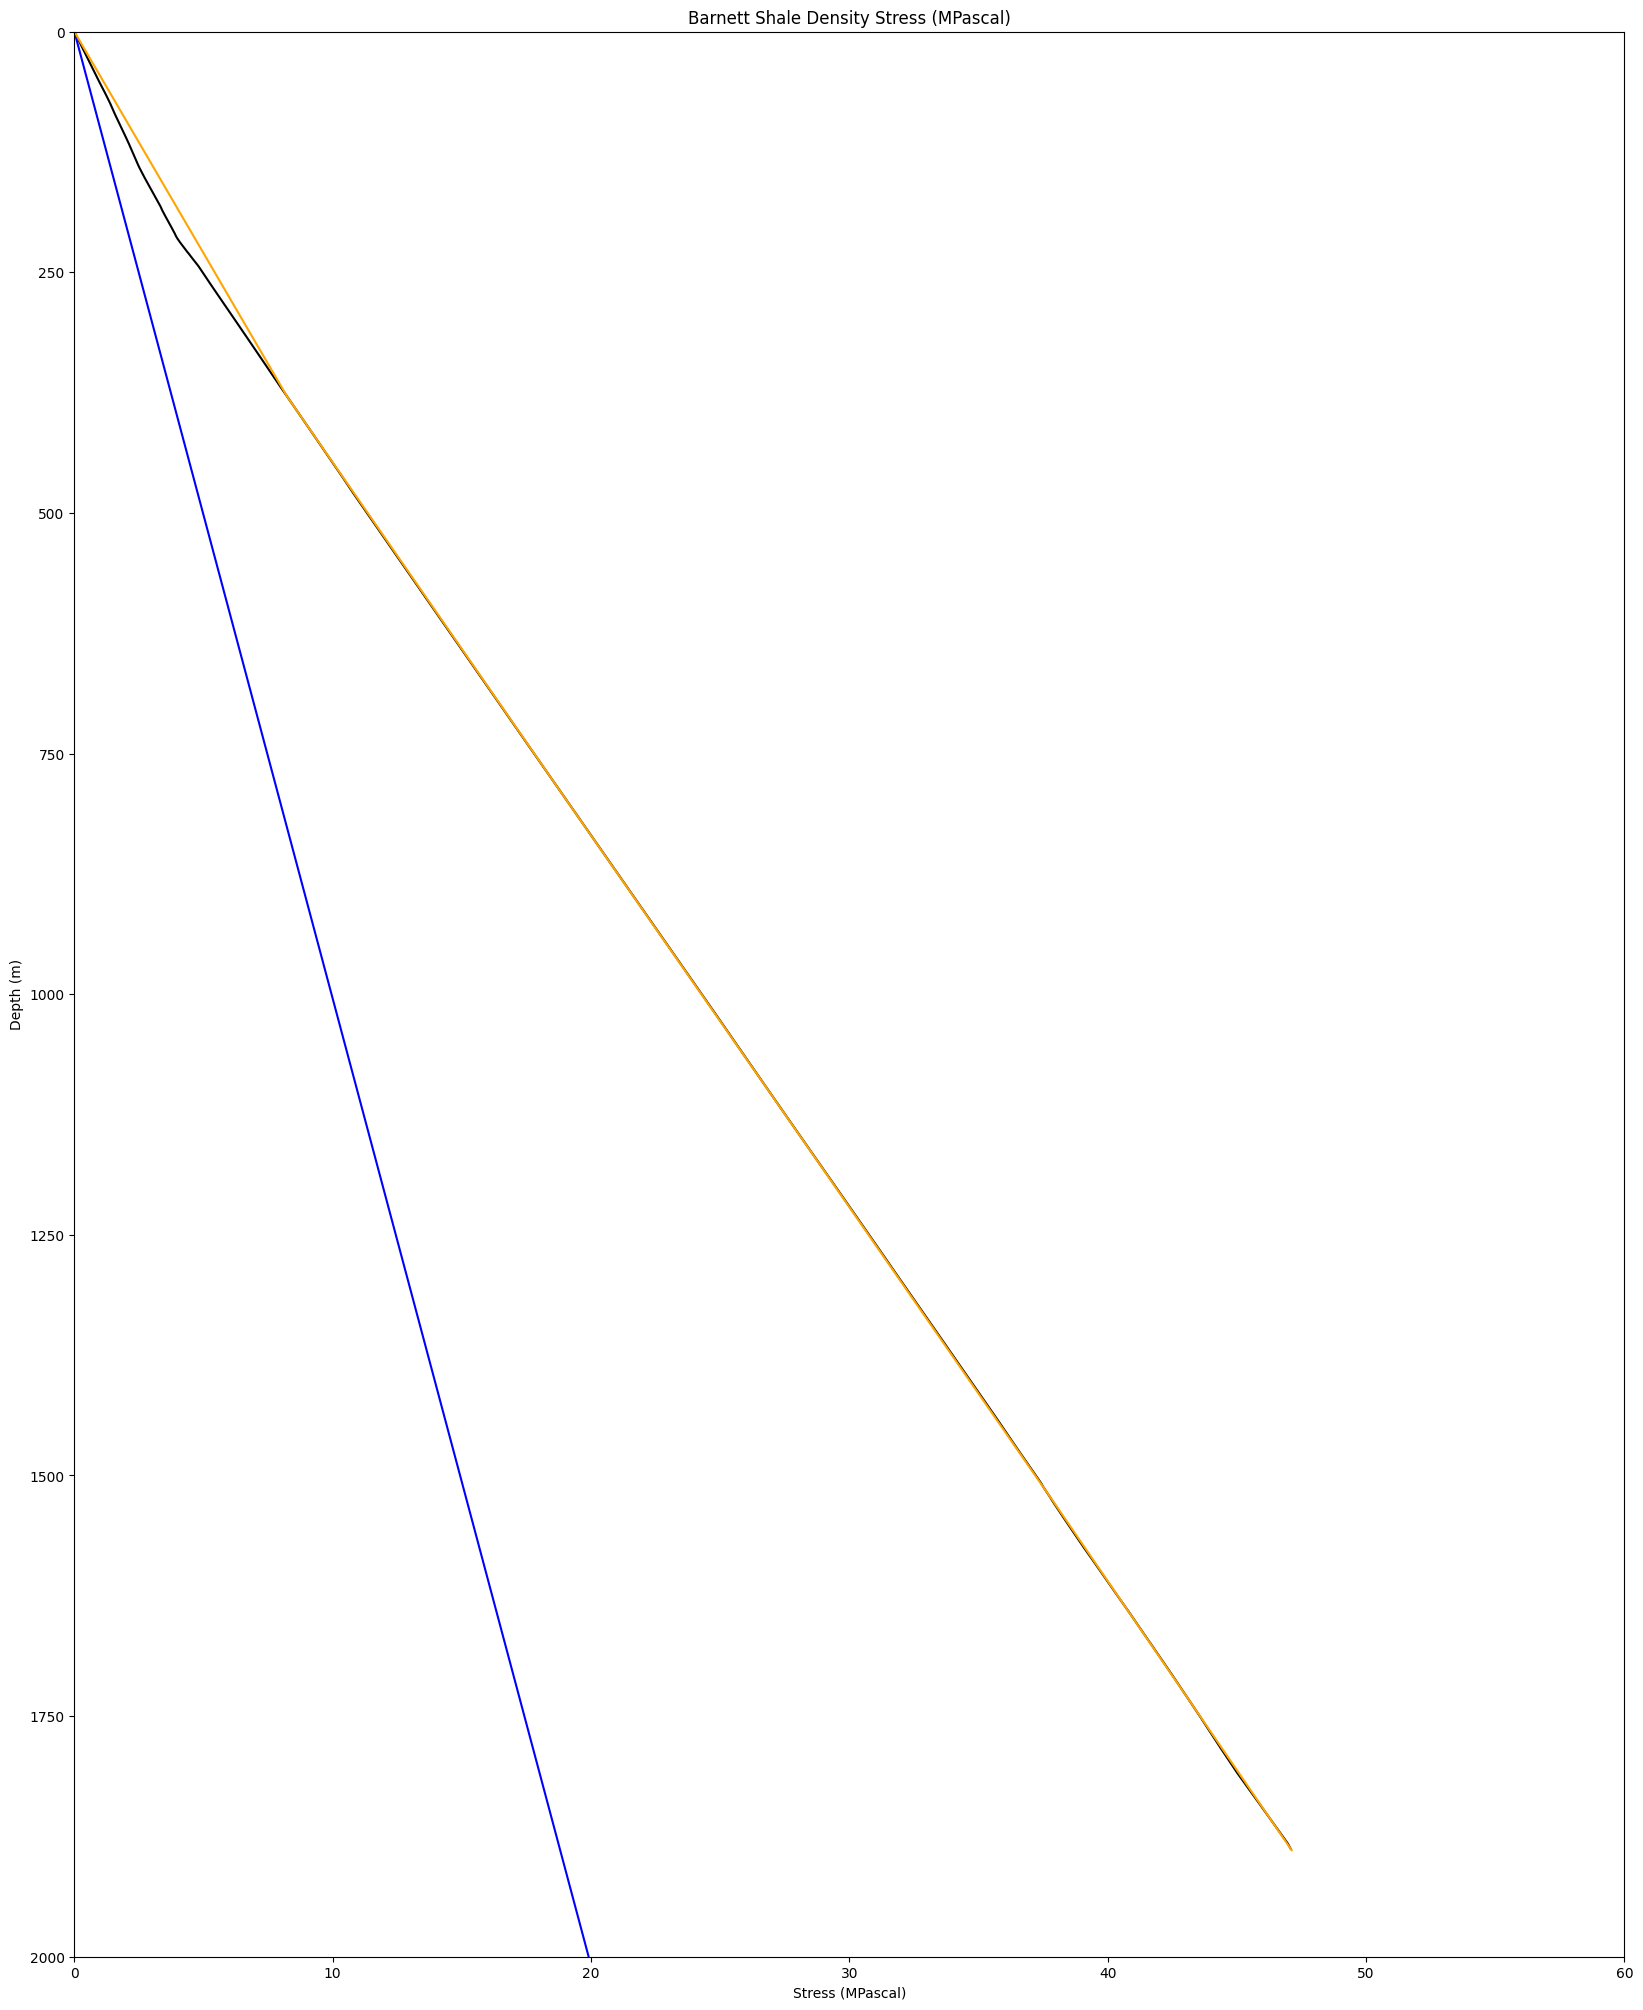

In [114]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Barnett_Shale_concat['Stress (MPascal)'], Barnett_Shale_concat.index, linewidth=1.5, color='black', label = Barnett_Shale_concat)
#plot pore pressure
plt.plot(pore_pressure['Stress (MPascal)'], pore_pressure.index, linewidth=1.5, color='blue', label = pore_pressure)
#plot blocks
plt.plot(Barnett_Shale_blocks['Stress (MPascal)'], Barnett_Shale_blocks.index, linewidth=1.5, color='orange', label = Barnett_Shale_blocks)
# Set the limits for the x and y axis
plt.xlim(0, 60)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(2000, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Stress (MPascal)')
plt.ylabel('Depth (m)')

# Set title for the plot
plt.title('Barnett Shale Density Stress (MPascal)')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

In [115]:
#Do the same with Golfo Mexico
#change density Density (g/cc to Kg/m³
for i in range(0, len(Golfo_Mexico_blocks)):
    Golfo_Mexico_blocks.iloc[i, Golfo_Mexico_blocks.columns.get_loc('Density (g/cc)')] = Golfo_Mexico_blocks.iloc[i, Golfo_Mexico_blocks.columns.get_loc('Density (g/cc)')] * 1000

In [116]:
#change density Depth ft to Depth m
Golfo_Mexico_blocks.index = Golfo_Mexico_blocks.index * 0.3048

In [117]:
#rename the column
Golfo_Mexico_blocks = Golfo_Mexico_blocks.rename(columns={'Density (g/cc)': 'Density (Kg/m³)'})
# Reset index to make index into column
Golfo_Mexico_blocks.reset_index(level=0, inplace=True)

# Rename the column
Golfo_Mexico_blocks = Golfo_Mexico_blocks.rename(columns={'Depth(ft)': 'Depth(m)'})
Golfo_Mexico_blocks.set_index('Depth(m)', inplace=True)


In [118]:
# Create a new column 'Stress' com todos os valores como NaN
Golfo_Mexico_blocks['Stress (MPascal)'] = np.nan

# Calculate the first stress value
Golfo_Mexico_blocks.iloc[1, Golfo_Mexico_blocks.columns.get_loc('Stress (MPascal)')] = (Golfo_Mexico_blocks.index[2] - Golfo_Mexico_blocks.index[1]) * Golfo_Mexico_blocks.iloc[1, Golfo_Mexico_blocks.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000

# Create a loop to calculate the stress
for i in range(2, len(Golfo_Mexico_blocks)):
    Golfo_Mexico_blocks.iloc[i, Golfo_Mexico_blocks.columns.get_loc('Stress (MPascal)')] = ((Golfo_Mexico_blocks.index[i] - Golfo_Mexico_blocks.index[i-1]) * Golfo_Mexico_blocks.iloc[i-1, Golfo_Mexico_blocks.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000) + Golfo_Mexico_blocks.iloc[i-1, Golfo_Mexico_blocks.columns.get_loc('Stress (MPascal)')]

In [119]:
Golfo_Mexico_blocks.tail()


,Density (Kg/m³),Stress (MPascal)
Depth(m),,
3992.2704,2384.227,75.093547
3992.4228,2384.227,75.097108
3992.5752,2384.227,75.100669
3992.7276,2384.227,75.104229
3992.8800,2384.227,75.107790


In [120]:
#redifine Golfo_Mexico_full
Golfo_Mexico_full = pd.concat([Golfo_mexico_sea, Golfo_mexico_floor, Golfo_Mexico])


In [121]:
Golfo_Mexico_full.tail()

,Density (g/cc)
Depth(ft),
13096.0,2.314
13097.0,2.314
13098.0,2.294
13099.0,2.294
13100.0,2.279


In [122]:
#rename the column
Golfo_Mexico_full = Golfo_Mexico_full.rename(columns={'Density (g/cc)': 'Density (Kg/m³)'})
# Reset index to make index into column
Golfo_Mexico_full.reset_index(level=0, inplace=True)

# Rename the column
Golfo_Mexico_full = Golfo_Mexico_full.rename(columns={'Depth(ft)': 'Depth(m)'})
Golfo_Mexico_full.set_index('Depth(m)', inplace=True)

In [123]:
#change density Depth ft to Depth m
Golfo_Mexico_full.index = Golfo_Mexico_full.index * 0.3048

In [124]:
#change density Density (g/cc to Kg/m³
for i in range(0, len(Golfo_Mexico_full)):
    Golfo_Mexico_full.iloc[i, Golfo_Mexico_full.columns.get_loc('Density (Kg/m³)')] = Golfo_Mexico_full.iloc[i, Golfo_Mexico_full.columns.get_loc('Density (Kg/m³)')] * 1000

In [125]:
# Create a new column 'Stress' com todos os valores como NaN
Golfo_Mexico_full['Stress (MPascal)'] = np.nan

# Calculate the first stress value
Golfo_Mexico_full.iloc[1, Golfo_Mexico_full.columns.get_loc('Stress (MPascal)')] = (Golfo_Mexico_full.index[2] - Golfo_Mexico_full.index[1]) * Golfo_Mexico_full.iloc[1, Golfo_Mexico_full.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000

# Create a loop to calculate the stress
for i in range(2, len(Golfo_Mexico_full)):
    Golfo_Mexico_full.iloc[i, Golfo_Mexico_full.columns.get_loc('Stress (MPascal)')] = ((Golfo_Mexico_full.index[i] - Golfo_Mexico_full.index[i-1]) * Golfo_Mexico_full.iloc[i-1, Golfo_Mexico_full.columns.get_loc('Density (Kg/m³)')] * 9.8/1000000) + Golfo_Mexico_full.iloc[i-1, Golfo_Mexico_full.columns.get_loc('Stress (MPascal)')]

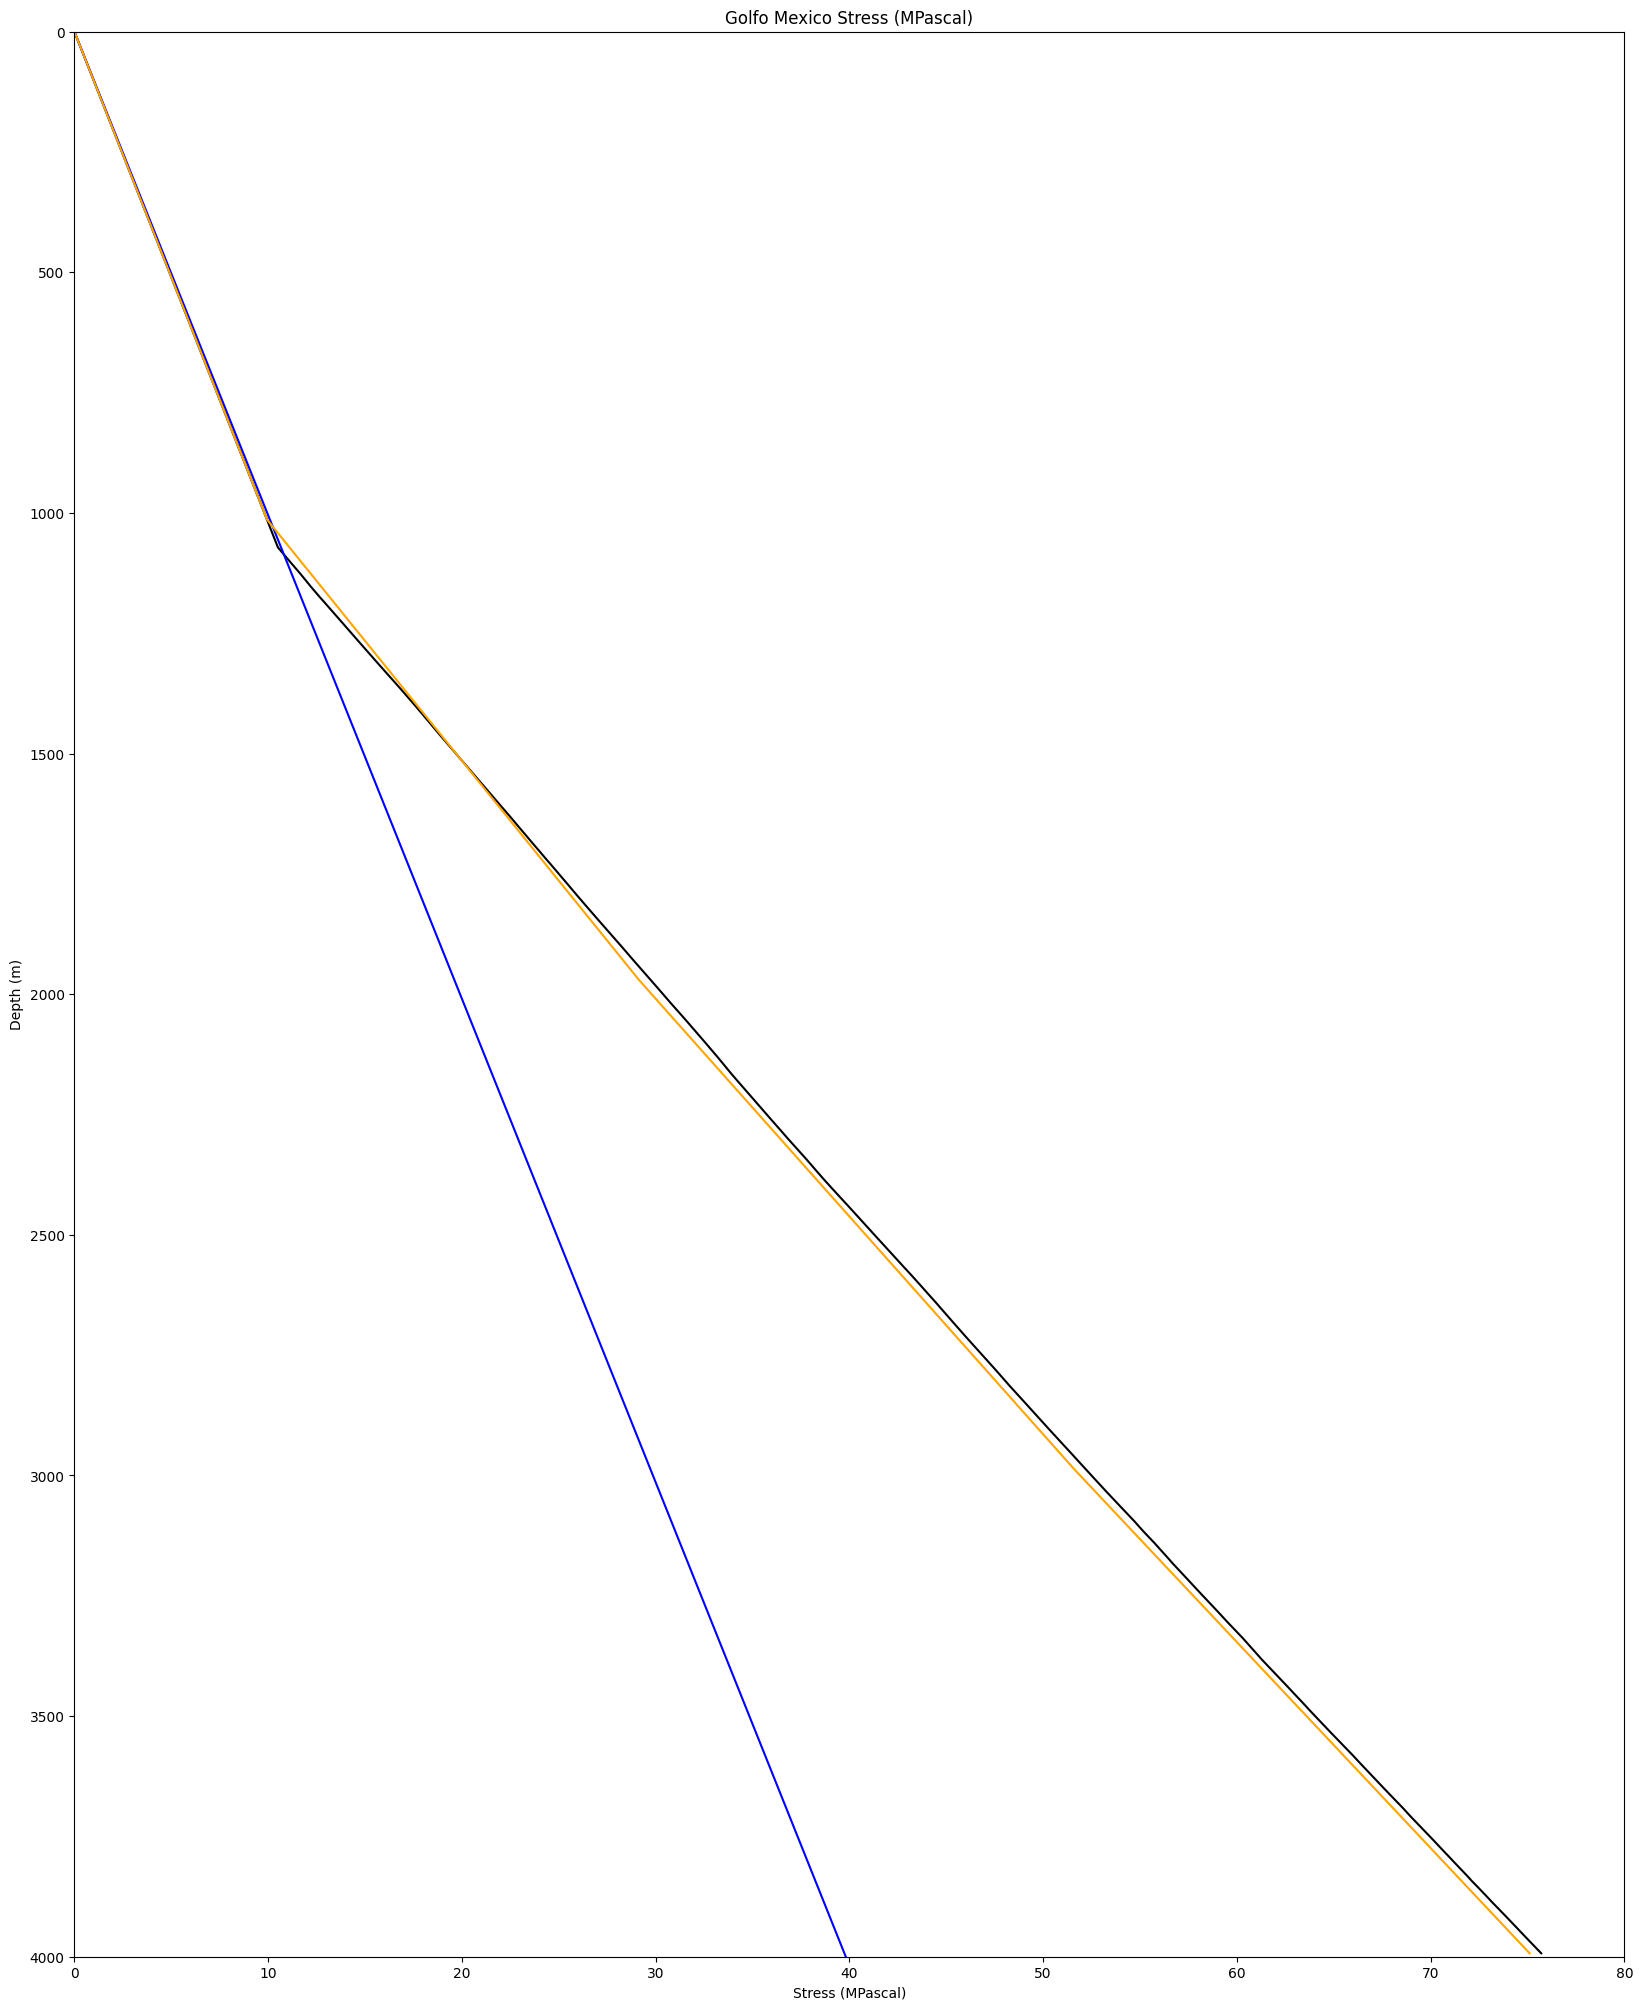

In [126]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico_full['Stress (MPascal)'], Golfo_Mexico_full.index, linewidth=1.5, color='black', label = Golfo_Mexico_full)
#plot pore pressure
plt.plot(pore_pressure['Stress (MPascal)'], pore_pressure.index, linewidth=1.5, color='blue', label = pore_pressure)
#plot blocks
plt.plot(Golfo_Mexico_blocks['Stress (MPascal)'], Golfo_Mexico_blocks.index, linewidth=1.5, color='orange', label = Golfo_Mexico_blocks)
# Set the limits for the x and y axis
plt.xlim(0, 80)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(4000, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Stress (MPascal)')
plt.ylabel('Depth (m)')

# Set title for the plot
plt.title('Golfo Mexico Stress (MPascal)')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

In [127]:
#calculate the Overburden Stress Profiles
Golfo_Mexico_full['Overburden'] = Golfo_Mexico_full['Stress (MPascal)']/Golfo_Mexico_full.index

In [128]:
Barnett_Shale_concat['Overburden'] = Barnett_Shale_concat['Stress (MPascal)']/Barnett_Shale_concat.index

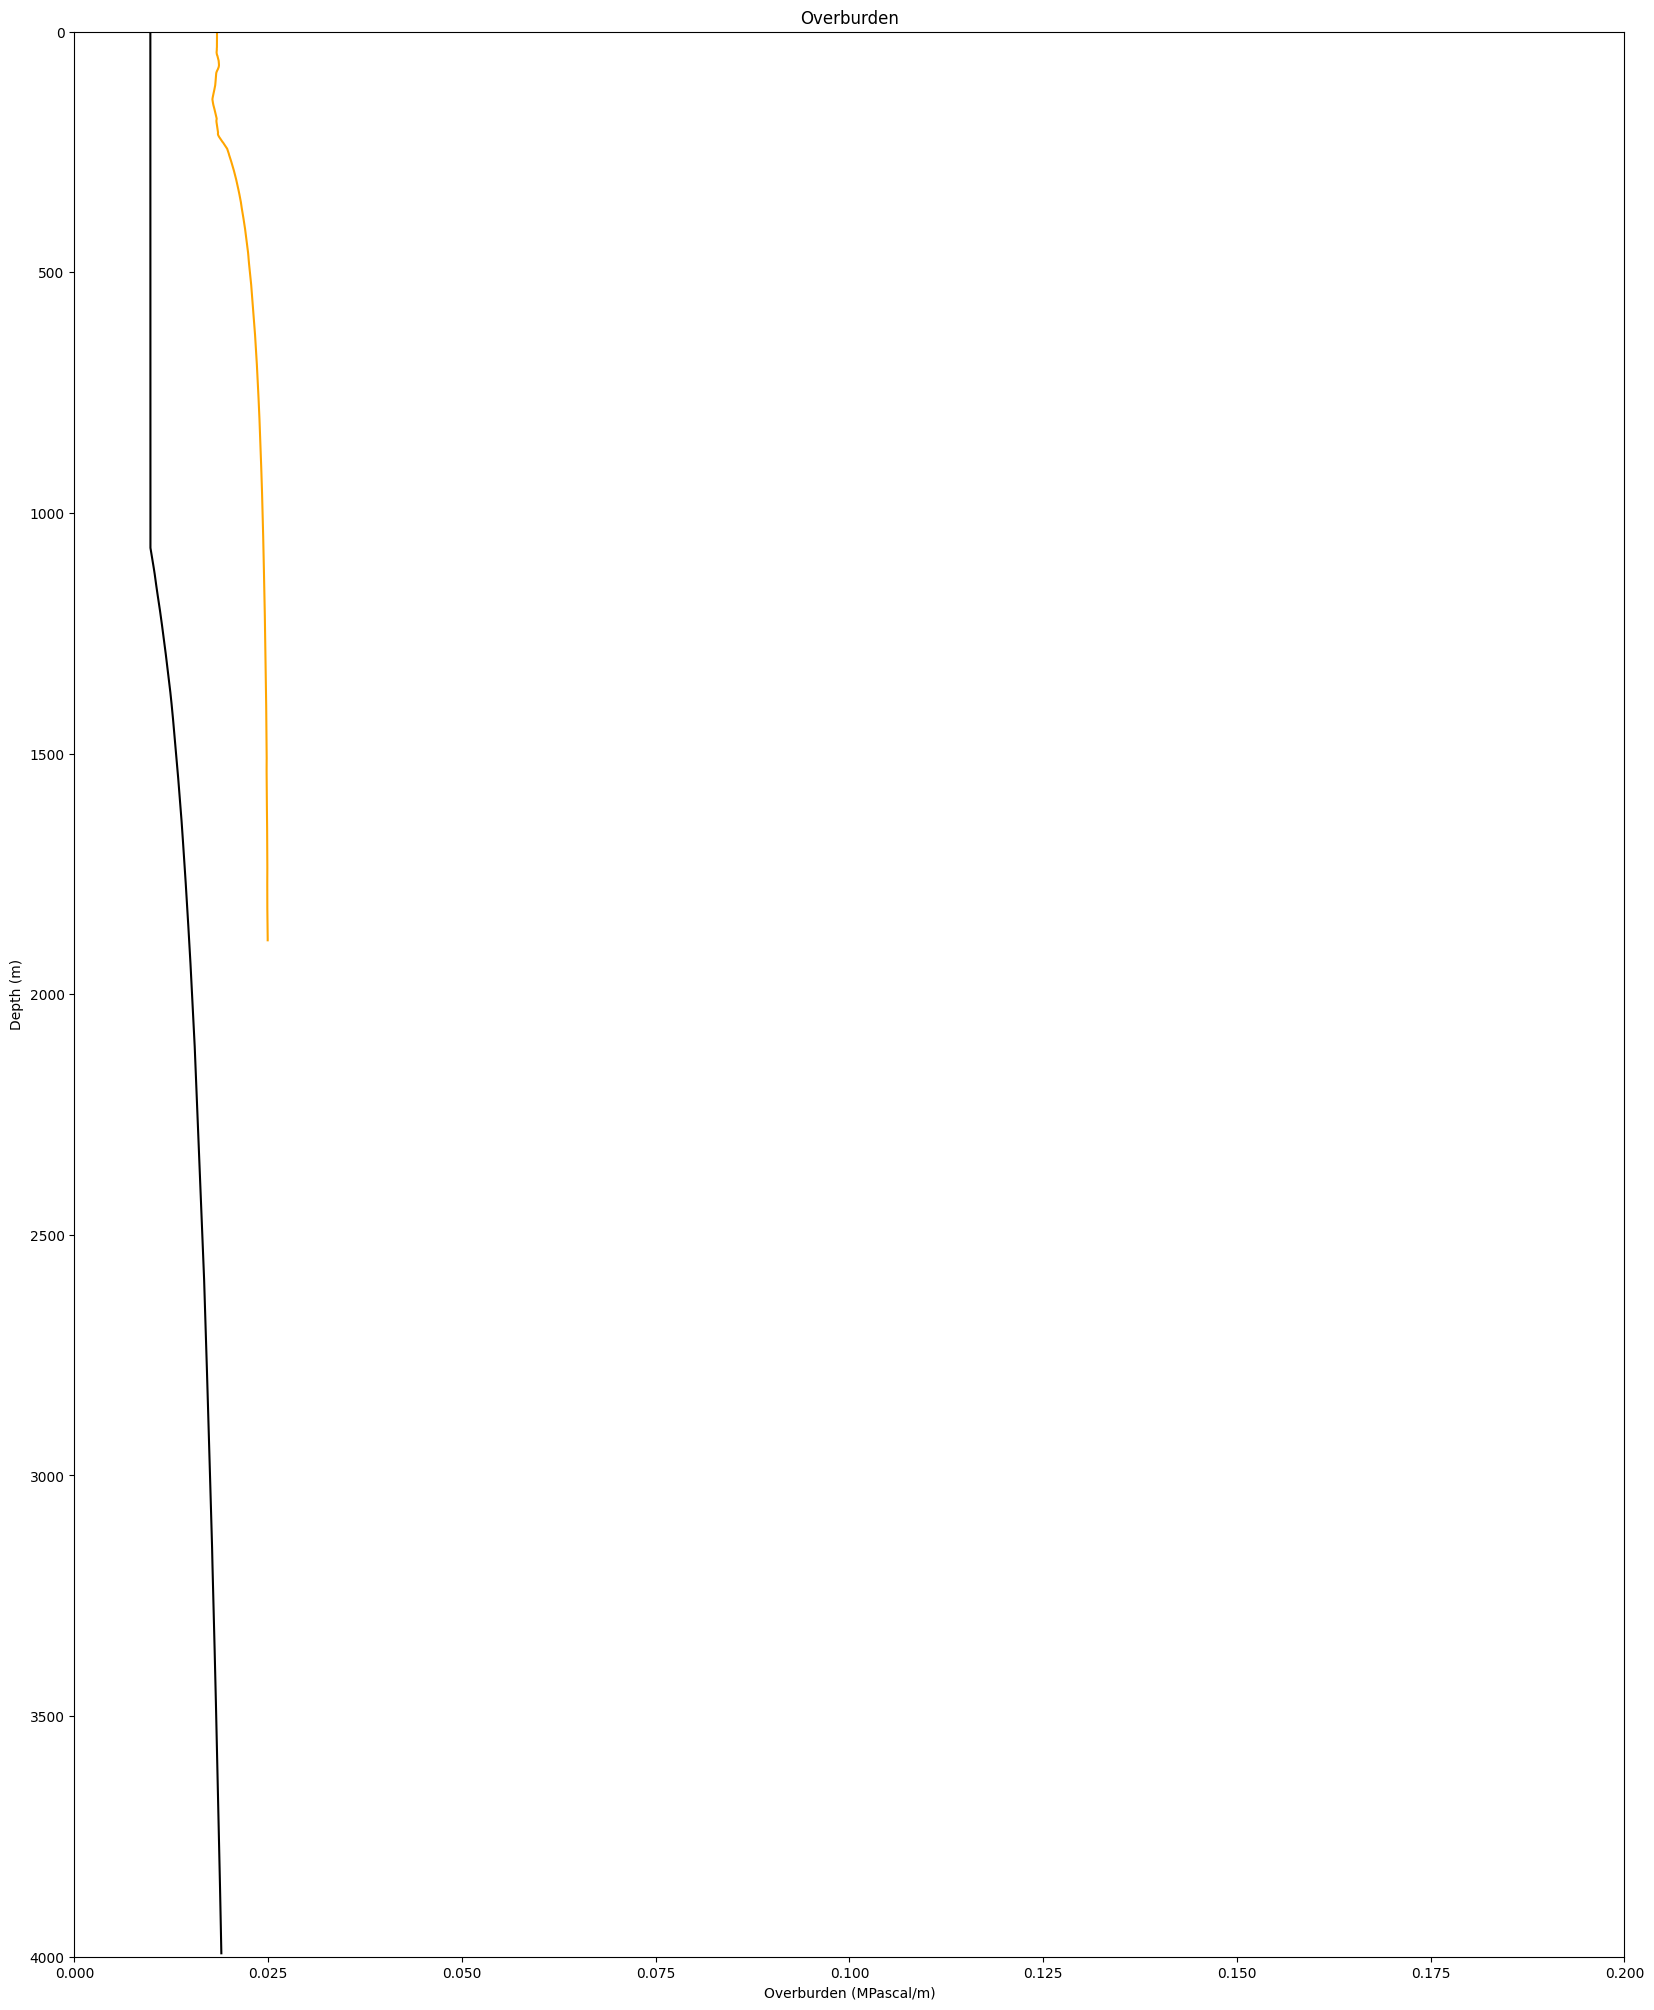

In [129]:
#define figsize
plt.figure(figsize=(20, 25))
#create a plot
plt.plot(Golfo_Mexico_full['Overburden'], Golfo_Mexico_full.index, linewidth=1.5, color='black', label = Golfo_Mexico_full)
#plot blocks
plt.plot(Barnett_Shale_concat['Overburden'], Barnett_Shale_concat.index, linewidth=1.5, color='orange', label = Barnett_Shale_concat)
# Set the limits for the x and y axis
plt.xlim(0, 0.2)  # Limits for the x-axis: from 1.5 to 3.0
plt.ylim(4000, 0)   # Limits for the y-axis: from 6200 to 0 (inverted)

# Set labels for x and y axis
plt.xlabel('Overburden (MPascal/m)')
plt.ylabel('Depth (m)')

# Set title for the plot
plt.title('Overburden')

#plot.invert_yaxis()
# Exiba o gráfico
plt.show()

Question 2.a: Overburden Stress Profiles
0.0/1.0 point (graded)
Refer to your overburden stress profiles for both data sets to answer these questions. Enter your answers in the blank without units.

What is the overburden stress in the Barnett Shale well at 5000 ft depth in psi?

Question 2.b: Overburden Stress Profiles
0.0/1.0 point (graded)
Refer to your overburden stress profiles for both data sets to answer these questions. Enter your answers in the blank without units.

What is the pore pressure in the Barnett Shale well at 5500 ft depth in psi?

In [ ]:
pore_pressure.index = pore_pressure.index/0.3048
x = pore_pressure.loc[5500, 'Stress (MPascal)']
pore_pressure_stress = pore_pressure*0.000145038*1000000
print(pore_pressure_stress)


pore_pressure_stress


In [ ]:
x = pore_pressure.loc[5500, 'Stress (MPascal)']
y = x*0.000145038*1000000